In [2]:
from importlib import reload

In [21]:
reload(medvqa.evaluation.report_generation)
reload(medvqa.evaluation.visual_module)
reload(medvqa.evaluation.results)

<module 'medvqa.evaluation.results' from '/home/pamessina/medvqa/medvqa/evaluation/results.py'>

In [32]:
import os
import pandas as pd
import medvqa
from medvqa.utils.common import RESULTS_DIR, WORKSPACE_DIR
from medvqa.utils.files import load_pickle
from medvqa.evaluation.results import (
    collect_report_level_results,
    collect_visual_module_results,
    get_report_level_metrics_dataframe,
    get_visual_module_metrics_dataframe,
    get_chexpert_based_output_metrics_dataframe,
    get_chest_imagenome_bbox_metrics_dataframe,
)

# (1) Report Generation results

In [26]:
df = get_report_level_metrics_dataframe('mimiccxr')

   ** Not cached key: ('/mnt/data/pamessina/workspaces/medvqa-workspace/results/vqa/20230108_144908_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.6_medtok_orien_chx_ql_amp/mimiccxr_report_level_metrics(eval_mode=template-based,chexpert-labels,thrs-calib).pkl', 1675394317.8452199)
Report level metrics updated and saved to /mnt/data/pamessina/workspaces/medvqa-workspace/cache/report_level_metrics_cache.pkl


In [27]:
df['bleu'] = (df['b1'] + df['b2'] + df['b3'] + df['b4']) / 4

In [28]:
df.columns

Index(['metrics_path', 'b1', 'b2', 'b3', 'b4', 'cD', 'rg-L', 'met', 'mdcmp',
       'wmdcmp', 'chxlabf1(hard)', 'p(micro)', 'r(micro)', 'f1(micro)',
       'p(macro)', 'r(macro)', 'f1(macro)', 'acc', 'p(NF)', 'p(EC)', 'p(Card)',
       'p(LL)', 'p(LO)', 'p(E)', 'p(Cons)', 'p(Pn)', 'p(A)', 'p(Pt)', 'p(PE)',
       'p(PO)', 'p(F)', 'p(SD)', 'r(NF)', 'r(EC)', 'r(Card)', 'r(LL)', 'r(LO)',
       'r(E)', 'r(Cons)', 'r(Pn)', 'r(A)', 'r(Pt)', 'r(PE)', 'r(PO)', 'r(F)',
       'r(SD)', 'f1(NF)', 'f1(EC)', 'f1(Card)', 'f1(LL)', 'f1(LO)', 'f1(E)',
       'f1(Cons)', 'f1(Pn)', 'f1(A)', 'f1(Pt)', 'f1(PE)', 'f1(PO)', 'f1(F)',
       'f1(SD)', 'folder', 'timestamp', 'datasets', 'vinbig_mode', 'model',
       'eval_mode', 'bs', 'epoch', 'pretrained', 'pretr_imgenc', 'vm-frozen',
       'mergef', 'medtok', 'amp', 'aug', 'gradacc_iters', 'bleu'],
      dtype='object')

### All experiments: general results

In [ ]:
# 20220724_174201

In [58]:
df.loc[41]['metrics_path']

'/home/pamessina/medvqa-workspace/results/vqa/20220706_135511_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(densenet121+bilstm+lstm)_model-args=(densenet121,128,None,512,1,128,1024,0,qenc=one-hot,pretrained)_cnn-pretr=0_dataset_weights=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql_use_amp/mimiccxr_report_level_metrics(eval_mode=chexpert+qclass;n_q_per_report=5;qclass_threshold=0.3).pkl'

In [55]:
df_aux = df[['folder', 'timestamp', 'model', 'datasets', 'vinbig_mode', 'vm-frozen', 'pretrained', 'amp', 'aug', 'mergef', 'medtok', 'epoch', 'eval_mode', 'f1(macro)', 'f1(micro)', 'wmdcmp', 'bleu', 'cD', 'rg-L', 'met']]
df_aux = df_aux.sort_values(['f1(macro)'], ascending=False)
df_aux = df_aux[df_aux['eval_mode'].str.contains('qclass')]
df_aux[:55]
# df_aux[:55][df_aux.columns[:15]]

,folder,timestamp,model,datasets,vinbig_mode,vm-frozen,pretrained,amp,aug,mergef,medtok,epoch,eval_mode,f1(macro),f1(micro),wmdcmp,bleu,cD,rg-L,met
98,vqa,20220724_174201,oevqa(dense121+onehot+transf),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),None,False,False,False,random-color-and-spatial,False,True,151,qclass;nqpr=20;qclassthr=0.45;chkpt=20220724_1...,0.451554,0.590210,0.091823,0.096413,2.935328e-02,0.176058,0.179153
41,vqa,20220706_135511,oevqa(densenet121+bilstm+lstm),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),None,False,True,True,random-color-and-spatial,False,True,170,chexpert+qclass;nqpr=5;qclassthr=0.3,0.447476,0.550930,0.091401,0.125979,2.439971e-02,0.187598,0.223826
34,vqa,20220827_134655,oevqa(dense121+onehot+transf),4:mim+mim(chex)+iu+iu(chex),all,True,True,True,random-color-and-spatial,False,True,101,qclass;n_q_per_rep=20;qclass_thr=0.5;probs=202...,0.445309,0.579780,0.093227,0.099414,3.941163e-02,0.178791,0.178411
30,vqa,20220827_134655,oevqa(dense121+onehot+transf),4:mim+mim(chex)+iu+iu(chex),all,True,True,True,random-color-and-spatial,False,True,101,qclass;n_q_per_rep=20;qclass_thr=0.5;probs=202...,0.443530,0.580803,0.092538,0.097687,3.736581e-02,0.178054,0.178329
100,vqa,20220724_174201,oevqa(dense121+onehot+transf),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),None,False,False,False,random-color-and-spatial,False,True,151,chexpert+qclass;nqpr=20;qclassthr=0.45;chkpt=2...,0.441999,0.551104,0.082954,0.091585,1.728720e-03,0.163598,0.234493
42,vqa,20220706_135511,oevqa(densenet121+bilstm+lstm),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),None,False,True,True,random-color-and-spatial,False,True,170,chexpert+qclass;nqpr=20;qclassthr=0.3,0.438460,0.545499,0.085313,0.100553,4.091258e-03,0.178750,0.234228
7,vqa,20220717_155233,oevqa(dense121+onehot+lstm),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),None,True,True,True,random-color-and-spatial,False,True,91,qclass;nqpr=20;qclassthr=0.45;chkpt=20220717_1...,0.433613,0.578729,0.088689,0.090296,2.036420e-02,0.172003,0.179341
33,vqa,20220827_134655,oevqa(dense121+onehot+transf),4:mim+mim(chex)+iu+iu(chex),all,True,True,True,random-color-and-spatial,False,True,101,qclass;n_q_per_rep=20;qclass_thr=0.5;probs=202...,0.433285,0.576447,0.086085,0.087640,2.237806e-02,0.170195,0.177817
129,vqa,20220711_200138,oevqa(densenet121+bilstm+lstm),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),None,False,True,True,random-color-and-spatial,False,True,76,qclass;nqpr=20;qclassthr=0.05;chkpt=20220712_1...,0.432966,0.576808,0.091042,0.101987,3.994014e-02,0.179024,0.173082
135,vqa,20220711_200138,oevqa(densenet121+bilstm+lstm),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),None,False,True,True,random-color-and-spatial,False,True,76,qclass;nqpr=20;qclassthr=0.1;chkpt=20220712_14...,0.432265,0.577287,0.091167,0.101871,3.975670e-02,0.179236,0.174155


### Incremental datasets: general results

In [5]:
df_vqa_inc = df[df['timestamp'] >= '20220816_210819']

In [6]:
# df_aux = df_vqa_inc[['folder', 'timestamp', 'model', 'datasets', 'vinbig_mode', 'vm-frozen', 'pretrained', 'amp', 'aug', 'mergef', 'medtok', 'bs', 'epoch', 'gradacc_iters', 'eval_mode', 'f1(macro)', 'f1(micro)', 'wmdcmp', 'blue', 'cD', 'rg-L', 'met']]
df_aux = df_vqa_inc[['folder', 'timestamp', 'model', 'datasets', 'vinbig_mode', 'eval_mode', 'vm-frozen', 'pretrained', 'medtok', 'mergef', 'aug', 'epoch',
                     'bleu', 'rg-L', 'cD', 'mdcmp', 'f1(macro)', 'p(macro)', 'r(macro)', 'f1(micro)', 'p(micro)', 'r(micro)']]
df_aux = df_aux.sort_values(['f1(macro)'], ascending=False)
# df_aux = df_aux[df_aux['eval_mode'].str.contains('chexpert') | df_aux['eval_mode'].str.contains('qclass')]
# df_aux = df_aux[df_aux['eval_mode'].str.contains('chexpert')]
# df_aux = df_aux[df_aux['eval_mode'].str.contains('rand-img')]
# df_aux = df_aux[df_aux['model'].str.contains('CenIA')]
# df_aux = df_aux.sort_values(['timestamp'], ascending=False)
# df_aux = df_aux.sort_values(['eval_mode', 'datasets', 'f1(macro)'], ascending=True)
# df_aux = df_aux[(df_aux['pretrained'] == False) & (df_aux['medtok'] == True)]
# df_aux = df_aux[(df_aux['pretrained'] == False) & (df_aux['medtok'] == True) & (df_aux['mergef'] == True)]
df_aux[df_aux.columns[:22]]

,folder,timestamp,model,datasets,vinbig_mode,eval_mode,vm-frozen,pretrained,medtok,mergef,...,bleu,rg-L,cD,mdcmp,f1(macro),p(macro),r(macro),f1(micro),p(micro),r(micro)
42,vqa,20220827_134655,oevqa(dense121+onehot+transf),4:mim+mim(chex)+iu+iu(chex),all,ground-truth,True,True,True,False,...,0.163202,0.263572,0.149632,0.175050,0.623077,0.595482,0.676378,0.719286,0.655646,0.796609
150,vqa,20220824_080354,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,all,ground-truth,False,False,True,False,...,0.166957,0.269440,0.179245,0.183387,0.621359,0.603817,0.666039,0.728537,0.670221,0.797969
31,vqa,20220827_140319,oevqa(dense121+onehot+transf),4:mim+mim(chex)+iu+iu(chex),all,ground-truth,True,True,True,False,...,0.167666,0.264848,0.157570,0.178801,0.610978,0.593163,0.655595,0.715465,0.662419,0.777748
11,vqa,20220824_112420,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,all,ground-truth,False,False,True,False,...,0.166495,0.268626,0.172875,0.180336,0.610025,0.598477,0.652185,0.721639,0.676723,0.772942
60,vqa,20220823_150528,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,test,ground-truth,False,False,True,False,...,0.164380,0.267099,0.172073,0.178897,0.608012,0.596448,0.651480,0.713788,0.671408,0.761879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,vqa,20220822_095024,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,all,qclass;nqpr=20;qclassthr=0.5;chkpt=20220822_09...,False,False,False,True,...,0.088346,0.176071,0.000135,0.079088,0.349625,0.303512,0.585428,0.499675,0.363412,0.799421
167,vqa,20220926_004746,oevqa(CenIA-clip-vte-vit-lp16bcbf+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,all,ground-truth;rand-img,False,True,True,False,...,0.150198,0.237674,0.133457,0.145296,0.347968,0.407133,0.428186,0.539134,0.504204,0.579265
59,vqa,20220823_150528,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,test,qclass;nqpr=20;qclassthr=0.5;chkpt=20220823_15...,False,False,True,False,...,0.083329,0.153094,0.023233,0.085598,0.347911,0.336985,0.539622,0.516533,0.392909,0.753663
134,vqa,20220817_045815,oevqa(dense121+onehot+transf),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),None,qclass;nqpr=20;qclassthr=0.5;chkpt=20220817_04...,False,False,False,False,...,0.080155,0.169943,0.000086,0.071011,0.345827,0.295992,0.593887,0.462302,0.342275,0.711973


In [7]:
df.loc[150]['metrics_path']

'/home/pamessina/medvqa-workspace/results/vqa/20220824_080354_mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa)+vinbig(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.5,0.4,0.4_medtok_orien_chx_ql_amp/mimiccxr_report_level_metrics(eval_mode=ground-truth).pkl'

In [313]:
row = df_aux.loc[107]
strings = []
for col in ['timestamp', 'model', 'datasets', 'vinbig_mode', 'eval_mode']:
    strings.append(str(row[col]))
for col in ['bleu', 'rg-L', 'cD', 'mdcmp', 'f1(macro)', 'p(macro)', 'r(macro)', 'f1(micro)', 'p(micro)', 'r(micro)']:
    strings.append(f'{row[col]:.3f}')
print(' & '.join(strings))

20220926_074409 & oevqa(CenIA-clip-vte-vit-lp16bcbf+onehot+transf) & 4:mim+mim(chex)+iu+iu(chex) & all & chexpert-labels & 0.150 & 0.199 & 0.040 & 0.087 & 0.472 & 0.389 & 0.653 & 0.582 & 0.464 & 0.779


In [30]:
df['metrics_path'][df['timestamp'] == '20220824_112420'].tolist()

['/home/pamessina/medvqa-workspace/results/vqa/20220824_112420_mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa)+vinbig(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.5,0.4,0.4_medtok_orien_chx_ql_amp/mimiccxr_report_level_metrics(eval_mode=chexpert-labels).pkl',
 '/home/pamessina/medvqa-workspace/results/vqa/20220824_112420_mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa)+vinbig(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.5,0.4,0.4_medtok_orien_chx_ql_amp/mimiccxr_report_level_metrics(eval_mode=question-classification;n_q_per_report=20;qclass_threshold=0.5;chkpt=20220824_112420).pkl',
 '/home/pamessina/medvqa-workspace/results/vqa/20220824_112420_mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa)+vinbig(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.5,0.4,0.4_medtok_orien_chx_ql_amp/mimiccxr_report_level_metrics(eval_mode=ground-truth).pkl']

### Incremental datasets: chexpert f1 scores

In [27]:
df_aux = df_vqa_inc.sort_values(['f1(macro)'], ascending=False)
df_aux = df_aux[['folder', 'timestamp', 'model', 'datasets', 'eval_mode', 'f1(macro)', 'f1(NF)', 'f1(EC)', 'f1(Card)', 'f1(LL)', 'f1(LO)', 'f1(E)', 'f1(Cons)', 'f1(Pn)', 'f1(A)', 'f1(Pt)', 'f1(PE)', 'f1(PO)', 'f1(F)', 'f1(SD)']]
df_aux

,folder,timestamp,model,datasets,eval_mode,f1(macro),f1(NF),f1(EC),f1(Card),f1(LL),f1(LO),f1(E),f1(Cons),f1(Pn),f1(A),f1(Pt),f1(PE),f1(PO),f1(F),f1(SD)
113,vqa,20220824_080354,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,ground-truth,0.621359,0.517241,0.635682,0.768792,0.669951,0.816122,0.740619,0.422156,0.607094,0.779555,0.167376,0.762481,0.479087,0.457338,0.875534
11,vqa,20220824_112420,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,ground-truth,0.610025,0.526316,0.600306,0.746544,0.686775,0.822926,0.742810,0.357262,0.573585,0.784873,0.198425,0.752630,0.462151,0.416667,0.869078
42,vqa,20220823_150528,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,ground-truth,0.608012,0.564593,0.560726,0.750485,0.705128,0.814948,0.756181,0.318612,0.579179,0.787234,0.163380,0.708194,0.503876,0.434483,0.865147
75,vqa,20220823_135418,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,ground-truth,0.603980,0.498645,0.589266,0.747712,0.639821,0.808685,0.733417,0.401114,0.594164,0.786676,0.157549,0.691540,0.482213,0.451411,0.873506
110,vqa,20220818_184140,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,ground-truth,0.593885,0.537170,0.659386,0.777442,0.704545,0.815510,0.661859,0.245665,0.568704,0.697835,0.314214,0.679579,0.320000,0.483871,0.848609
55,vqa,20220817_135112,oevqa(dense121+onehot+transf),6:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa),ground-truth,0.591789,0.542797,0.626286,0.781824,0.705637,0.806144,0.663057,0.262260,0.560522,0.708549,0.274882,0.653803,0.331797,0.509434,0.858046
104,vqa,20220826_042711,oevqa(dense121+onehot+transf),6:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+vinbig(...,ground-truth,0.591532,0.482759,0.529477,0.750549,0.580220,0.794941,0.731769,0.439086,0.556213,0.777187,0.175637,0.738019,0.402878,0.460526,0.862193
126,vqa,20220816_210819,oevqa(dense121+onehot+transf),2:mim+mim(chex),ground-truth,0.587401,0.550495,0.658268,0.771966,0.683544,0.811917,0.620893,0.362336,0.536817,0.722258,0.262376,0.655296,0.323529,0.400000,0.863926
101,vqa,20220817_045815,oevqa(dense121+onehot+transf),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),ground-truth,0.586322,0.547414,0.599099,0.774974,0.739726,0.813579,0.679028,0.256671,0.538206,0.690098,0.273839,0.691001,0.320000,0.439759,0.845110
25,vqa,20220818_184727,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,ground-truth,0.582565,0.521158,0.612922,0.764061,0.685106,0.791990,0.658721,0.165367,0.510016,0.688239,0.288416,0.691474,0.417476,0.502392,0.858577


### Incremental datasets: chexpert precisions

In [9]:
df_aux = df_vqa_inc.sort_values(['p(macro)'], ascending=False)
df_aux = df_aux[['folder', 'timestamp', 'model', 'datasets', 'eval_mode', 'p(macro)', 'p(NF)', 'p(EC)', 'p(Card)',
       'p(LL)', 'p(LO)', 'p(E)', 'p(Cons)', 'p(Pn)', 'p(A)', 'p(Pt)', 'p(PE)',
       'p(PO)', 'p(F)', 'p(SD)']]
df_aux

,folder,timestamp,model,datasets,eval_mode,p(macro),p(NF),p(EC),p(Card),p(LL),p(LO),p(E),p(Cons),p(Pn),p(A),p(Pt),p(PE),p(PO),p(F),p(SD)
36,vqa,20220823_150528,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,ground-truth,0.596448,0.508621,0.552573,0.712270,0.606618,0.734771,0.674525,0.480952,0.644372,0.663082,0.109228,0.840278,0.520000,0.529412,0.773576
69,vqa,20220823_135418,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,ground-truth,0.585962,0.502732,0.561587,0.716792,0.569721,0.718457,0.643485,0.489796,0.591810,0.662291,0.097959,0.865364,0.508333,0.486486,0.788655
114,vqa,20220816_210819,oevqa(dense121+onehot+transf),2:mim+mim(chex),ground-truth,0.559127,0.435737,0.604629,0.772758,0.582734,0.735952,0.627976,0.366265,0.417282,0.574897,0.235556,0.726473,0.464789,0.475806,0.806923
101,vqa,20220818_184140,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,ground-truth,0.557313,0.484848,0.600948,0.764356,0.635246,0.743236,0.563823,0.317164,0.491279,0.544831,0.283784,0.641437,0.391304,0.539568,0.800552
49,vqa,20220817_135112,oevqa(dense121+onehot+transf),6:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa),ground-truth,0.551425,0.443686,0.621315,0.794221,0.597173,0.743343,0.581022,0.239300,0.450000,0.563337,0.238683,0.672006,0.428571,0.551020,0.796267
19,vqa,20220818_184727,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,ground-truth,0.549873,0.444867,0.631258,0.821036,0.587591,0.713901,0.557873,0.244240,0.429745,0.534816,0.250000,0.691474,0.589041,0.425101,0.777273
41,vqa,20220822_104439,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,ground-truth,0.548547,0.419355,0.641463,0.789700,0.612100,0.737569,0.542953,0.278970,0.440678,0.526743,0.248927,0.676577,0.571429,0.440909,0.752284
95,vqa,20220817_045815,oevqa(dense121+onehot+transf),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),ground-truth,0.548200,0.456835,0.585903,0.784465,0.669421,0.721328,0.590258,0.278237,0.418142,0.531044,0.243478,0.691251,0.477612,0.453416,0.773409
58,vqa,20220822_095024,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,ground-truth,0.541208,0.445255,0.648427,0.758904,0.644351,0.697950,0.604396,0.245487,0.389373,0.572170,0.254417,0.688834,0.400000,0.412903,0.814450
52,vqa,20220816_224509,oevqa(dense121+onehot+transf),4:mim+mim(chex)+iu+iu(chex),ground-truth,0.539660,0.438944,0.612676,0.775956,0.634454,0.728050,0.575472,0.265193,0.454545,0.551497,0.230769,0.679828,0.388060,0.400000,0.819800


### Incremental datasets: chexpert recalls

In [10]:
df_aux = df_vqa_inc.sort_values(['r(macro)'], ascending=False)
df_aux = df_aux[['folder', 'timestamp', 'model', 'datasets', 'eval_mode', 'r(macro)', 'r(NF)', 'r(EC)', 'r(Card)', 'r(LL)', 'r(LO)',
       'r(E)', 'r(Cons)', 'r(Pn)', 'r(A)', 'r(Pt)', 'r(PE)', 'r(PO)', 'r(F)',
       'r(SD)']]
df_aux

,folder,timestamp,model,datasets,eval_mode,r(macro),r(NF),r(EC),r(Card),r(LL),r(LO),r(E),r(Cons),r(Pn),r(A),r(Pt),r(PE),r(PO),r(F),r(SD)
40,vqa,20220822_104439,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,chexpert-labels,0.739652,0.199074,0.847926,0.800546,0.637755,0.901342,0.883608,0.820755,0.749667,0.882199,0.575419,0.866329,0.789474,0.555556,0.845483
67,vqa,20220823_135418,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,chexpert-labels,0.721795,0.171296,0.822581,0.812158,0.647959,0.854362,0.902037,0.794811,0.806924,0.799302,0.497207,0.812139,0.812030,0.508772,0.863551
34,vqa,20220823_150528,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,chexpert-labels,0.713867,0.226852,0.699309,0.883880,0.591837,0.885235,0.902037,0.771226,0.740346,0.862129,0.486034,0.812861,0.714286,0.561404,0.856698
112,vqa,20220816_210819,oevqa(dense121+onehot+transf),2:mim+mim(chex),chexpert-labels,0.712866,0.273148,0.888249,0.822404,0.673469,0.867114,0.811833,0.698113,0.717710,0.767888,0.480447,0.869942,0.781955,0.502924,0.824922
99,vqa,20220818_184140,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,chexpert-labels,0.712320,0.152778,0.826037,0.861339,0.632653,0.911409,0.887488,0.752358,0.677763,0.802792,0.474860,0.882948,0.714286,0.578947,0.816822
57,vqa,20220822_095024,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,chexpert-labels,0.706837,0.254630,0.718894,0.780738,0.576531,0.918121,0.846751,0.768868,0.656458,0.790576,0.564246,0.842486,0.842105,0.502924,0.832399
48,vqa,20220817_135112,oevqa(dense121+onehot+transf),6:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa),chexpert-labels,0.701896,0.175926,0.654378,0.854508,0.673469,0.863758,0.869059,0.724057,0.717710,0.814136,0.508380,0.825145,0.751880,0.584795,0.809346
18,vqa,20220818_184727,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,chexpert-labels,0.699875,0.106481,0.861751,0.823087,0.596939,0.900000,0.888458,0.674528,0.649800,0.791449,0.497207,0.839595,0.781955,0.532164,0.854829
94,vqa,20220817_045815,oevqa(dense121+onehot+transf),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),chexpert-labels,0.688643,0.148148,0.722350,0.833333,0.632653,0.854362,0.844811,0.726415,0.671105,0.823735,0.519553,0.851156,0.714286,0.485380,0.813707
50,vqa,20220816_224509,oevqa(dense121+onehot+transf),4:mim+mim(chex)+iu+iu(chex),chexpert-labels,0.678143,0.208333,0.816820,0.823770,0.530612,0.828859,0.781765,0.724057,0.664447,0.828098,0.547486,0.846821,0.639098,0.415205,0.838629


In [11]:
f1_keys = ['f1(NF)', 'f1(EC)', 'f1(Card)', 'f1(LL)', 'f1(LO)', 'f1(E)', 'f1(Cons)', 'f1(Pn)', 'f1(A)', 'f1(Pt)',
       'f1(PE)', 'f1(PO)', 'f1(F)', 'f1(SD)']

In [12]:
metrics_pdpino_miccai = {
    'cD': 0.283,
    'rg-L': 0.185,
    'f1(NF)': 0.410,
    'f1(EC)': 0.245,
    'f1(Card)': 0.583,    
    'f1(LL)': 0.155,
    'f1(LO)': 0.563,
    'f1(E)': 0.617,
    'f1(Cons)': 0.265,
    'f1(Pn)': 0.433,
    'f1(A)': 0.555,
    'f1(Pt)': 0.287,
    'f1(PE)': 0.733,
    'f1(PO)': 0.228,
    'f1(F)': 0.159,
    'f1(SD)': 0.766,
}
metrics_pdpino_miccai['f1(macro)'] = sum(metrics_pdpino_miccai[k] for k in f1_keys) / len(f1_keys)
metrics_pdpino_miccai

{'cD': 0.283,
 'rg-L': 0.185,
 'f1(NF)': 0.41,
 'f1(EC)': 0.245,
 'f1(Card)': 0.583,
 'f1(LL)': 0.155,
 'f1(LO)': 0.563,
 'f1(E)': 0.617,
 'f1(Cons)': 0.265,
 'f1(Pn)': 0.433,
 'f1(A)': 0.555,
 'f1(Pt)': 0.287,
 'f1(PE)': 0.733,
 'f1(PO)': 0.228,
 'f1(F)': 0.159,
 'f1(SD)': 0.766,
 'f1(macro)': 0.4285}

In [13]:
metrics_pdpino_tesis = {
    'cD': 0.078,
    'rg-L': 0.225,
    'f1(NF)': 0.354,
    'f1(EC)': 0.449,
    'f1(Card)': 0.708,    
    'f1(LL)': 0.277,
    'f1(LO)': 0.644,
    'f1(E)': 0.622,
    'f1(Cons)': 0.274,
    'f1(Pn)': 0.376,
    'f1(A)': 0.610,
    'f1(Pt)': 0.237,
    'f1(PE)': 0.739,
    'f1(PO)': 0.073,
    'f1(F)': 0.260,
    'f1(SD)': 0.846,
}
metrics_pdpino_tesis['f1(macro)'] = sum(metrics_pdpino_tesis[k] for k in f1_keys) / len(f1_keys)
metrics_pdpino_tesis

{'cD': 0.078,
 'rg-L': 0.225,
 'f1(NF)': 0.354,
 'f1(EC)': 0.449,
 'f1(Card)': 0.708,
 'f1(LL)': 0.277,
 'f1(LO)': 0.644,
 'f1(E)': 0.622,
 'f1(Cons)': 0.274,
 'f1(Pn)': 0.376,
 'f1(A)': 0.61,
 'f1(Pt)': 0.237,
 'f1(PE)': 0.739,
 'f1(PO)': 0.073,
 'f1(F)': 0.26,
 'f1(SD)': 0.846,
 'f1(macro)': 0.4620714285714286}

In [14]:
metrics_M2Trans = {
    'cD':  0.67,
    'f1(NF)': 0.454,
    'f1(EC)': 0.093,
    'f1(Card)': 0.485,
    'f1(LL)': 0.075,
    'f1(LO)': 0.449,
    'f1(E)': 0.614,
    'f1(Cons)': 0.132,
    'f1(Pn)': 0.267,
    'f1(A)': 0.53,
    'f1(Pt)': 0.314,
    'f1(PE)': 0.727,
    'f1(PO)': 0.,
    'f1(F)': 0.152,
    'f1(SD)': 0.635,
}
metrics_M2Trans['f1(macro)'] = sum(metrics_M2Trans[k] for k in f1_keys) / len(f1_keys)
metrics_M2Trans

{'cD': 0.67,
 'f1(NF)': 0.454,
 'f1(EC)': 0.093,
 'f1(Card)': 0.485,
 'f1(LL)': 0.075,
 'f1(LO)': 0.449,
 'f1(E)': 0.614,
 'f1(Cons)': 0.132,
 'f1(Pn)': 0.267,
 'f1(A)': 0.53,
 'f1(Pt)': 0.314,
 'f1(PE)': 0.727,
 'f1(PO)': 0.0,
 'f1(F)': 0.152,
 'f1(SD)': 0.635,
 'f1(macro)': 0.3519285714285715}

## Recent results (MAE and other stuff)

In [29]:
df_recent = df[df['timestamp'] >= '20221200_000000']

In [30]:
df_aux = df_recent[['folder', 'timestamp', 'model', 'datasets', 'eval_mode', 'vm-frozen', 'pretrained', 'pretr_imgenc', 'aug', 'epoch',
                     'bleu', 'rg-L', 'cD', 'mdcmp', 'f1(macro)', 'p(macro)', 'r(macro)', 'f1(micro)', 'p(micro)', 'r(micro)']]
df_aux = df_aux.sort_values(['f1(macro)'], ascending=False)
# df_aux = df_aux.sort_values(['timestamp'], ascending=False)
df_aux

,folder,timestamp,model,datasets,eval_mode,vm-frozen,pretrained,pretr_imgenc,aug,epoch,bleu,rg-L,cD,mdcmp,f1(macro),p(macro),r(macro),f1(micro),p(micro),r(micro)
210,report_gen,20230202_154439,oracle,1:mimiccxr,"template-based,chest-imagenome-labels--oracle",False,None,None,None,None,0.047863,0.138305,0.007412,0.055945,0.716096,0.716294,0.746125,0.789437,0.734795,0.852858
191,vqa,20230108_144908,oevqa(dense121+onehot+transf),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),ground-truth,False,True,False,random-color-and-spatial,58,0.165379,0.262174,0.133118,0.172421,0.576107,0.527588,0.653617,0.682763,0.611352,0.773062
177,vqa,20230131_072359,oevqa(dense121+onehot+transf),2:mim+mim(chst-imgn),ground-truth;eval_view_mode=front_all,False,True,False,random-color-and-spatial,89,0.152276,0.257002,0.133933,0.167239,0.569288,0.531612,0.640832,0.676664,0.603732,0.769639
178,vqa,20230131_072359,oevqa(dense121+onehot+transf),2:mim+mim(chst-imgn),ground-truth;eval_view_mode=front_single,False,True,False,random-color-and-spatial,89,0.168575,0.262383,0.149570,0.172881,0.568153,0.535345,0.633480,0.677541,0.608932,0.763574
47,vqa,20230124_154438,oevqa(CenIA-vit-mae-base-ft-mimic+onehot+transf),2:mim+mim(chex),ground-truth,False,True,False,random-color-and-spatial,30,0.164293,0.259412,0.137509,0.168483,0.565497,0.517990,0.648644,0.673246,0.599460,0.767745
6,vqa,20230201_080625,oevqa(dense121+onehot+transf),3:mim+mim(chex)+mim(chst-imgn),ground-truth;eval_view_mode=front_single,True,True,False,random-color-and-spatial,46,0.162211,0.260173,0.125830,0.169863,0.563660,0.518698,0.641014,0.678864,0.599564,0.782337
99,vqa,20230108_144019,oevqa(facebook-vit-mae-base+onehot+transf),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),ground-truth,False,True,False,random-color-and-spatial,58,0.156700,0.256134,0.122163,0.162047,0.554759,0.505604,0.649379,0.649862,0.565917,0.763048
197,vqa,20221231_012821,oevqa(facebook-vit-mae-base+onehot+transf),8:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,ground-truth,False,False,False,random-color-and-spatial,96,0.144564,0.243487,0.097093,0.149113,0.553507,0.593636,0.652028,0.642722,0.551619,0.769872
133,vqa,20221231_010452,oevqa(dense121+onehot+transf),8:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,ground-truth,False,False,False,random-color-and-spatial,81,0.160486,0.256127,0.128341,0.163312,0.549368,0.501211,0.640898,0.646259,0.561870,0.760479
69,vqa,20230124_001640,oevqa(CenIA-vit-mae-base-ft-mimic+onehot+transf),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),ground-truth,False,True,False,random-color-and-spatial,35,0.165845,0.257742,0.142150,0.165059,0.544595,0.502569,0.626278,0.650983,0.578534,0.744174


In [56]:
df['metrics_path'].iloc[189]

'/mnt/data/pamessina/workspaces/medvqa-workspace/results/vqa/20230108_144908_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,0.8,0.2,0.16,0.6_medtok_orien_chx_ql_amp/mimiccxr_report_level_metrics(eval_mode=chexpert-labels).pkl'

# (2) Visual Module results

In [199]:
df_vm = plot_visual_module_metrics('mimiccxr')

31it [00:00, 7391.89it/s]


In [200]:
df_vm.columns

Index(['metrics_path', 'oracc', 'chxlacc', 'f1(macro)', 'p(macro)', 'r(macro)',
       'f1(micro)', 'p(micro)', 'r(micro)', 'f1(NF)', 'f1(EC)', 'f1(Card)',
       'f1(LL)', 'f1(LO)', 'f1(E)', 'f1(Cons)', 'f1(Pn)', 'f1(A)', 'f1(Pt)',
       'f1(PE)', 'f1(PO)', 'f1(F)', 'f1(SD)', 'p(NF)', 'p(EC)', 'p(Card)',
       'p(LL)', 'p(LO)', 'p(E)', 'p(Cons)', 'p(Pn)', 'p(A)', 'p(Pt)', 'p(PE)',
       'p(PO)', 'p(F)', 'p(SD)', 'r(NF)', 'r(EC)', 'r(Card)', 'r(LL)', 'r(LO)',
       'r(E)', 'r(Cons)', 'r(Pn)', 'r(A)', 'r(Pt)', 'r(PE)', 'r(PO)', 'r(F)',
       'r(SD)', 'rocauc(macro)', 'rocauc(micro)', 'rocauc(NF)', 'rocauc(EC)',
       'rocauc(Card)', 'rocauc(LL)', 'rocauc(LO)', 'rocauc(E)', 'rocauc(Cons)',
       'rocauc(Pn)', 'rocauc(A)', 'rocauc(Pt)', 'rocauc(PE)', 'rocauc(PO)',
       'rocauc(F)', 'rocauc(SD)', 'ql_f1(macro)', 'ql_p(macro)', 'ql_r(macro)',
       'ql_f1(micro)', 'ql_p(micro)', 'ql_r(micro)', 'folder', 'timestamp',
       'datasets', 'model', 'vm-frozen', 'amp', 'mergef', 'medtok

### All experiments: general results

In [166]:
df_aux = df_vm.sort_values(['f1(macro)'], ascending=False)
df_aux = df_aux[['folder', 'timestamp', 'model', 'datasets', 'vm-frozen', 'mergef', 'medtok', 'f1(macro)', 'f1(micro)', 'ql_f1(macro)', 'ql_f1(micro)']]
df_aux

,folder,timestamp,model,datasets,vm-frozen,mergef,medtok,f1(macro),f1(micro),ql_f1(macro),ql_f1(micro)
6,vqa,20220823_150528,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,False,False,True,0.485656,0.592831,0.215566,0.421666
12,vqa,20220724_174201,oevqa(dense121+onehot+transf),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),False,False,True,0.484659,0.594222,0.233141,0.504653
0,vqa,20220719_125734,oevqa(dense121+onehot+lstm),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),False,False,True,0.484172,0.594482,0.229023,0.487767
14,vqa,20220818_184140,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,False,False,False,0.482983,0.587451,0.212140,0.405062
1,vqa,20220717_155233,oevqa(dense121+onehot+lstm),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),True,False,True,0.482027,0.588771,0.231894,0.499893
2,vqa,20220824_112420,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,False,False,True,0.481929,0.595035,0.214355,0.411805
3,vqa,20220630_162749,oevqa(densenet121+bilstm+lstm),3:mimiccxr+iuxray+chexpert(vqa),False,False,True,0.481470,0.589732,0.230933,0.501282
4,vqa,20220818_184727,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,False,False,False,0.481372,0.587309,0.210269,0.405091
8,vqa,20220817_135112,oevqa(dense121+onehot+transf),6:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa),False,False,False,0.477957,0.581546,0.208788,0.400501
15,vqa,20220824_080354,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,False,False,True,0.477523,0.586981,0.206735,0.390016


### Incremental datasets: general results

In [276]:
df_vm_inc = df_vm[df_vm['timestamp'] >= '20220816_210819']

In [277]:
df_aux = df_vm_inc.sort_values(['f1(macro)'], ascending=False)
df_aux = df_aux[['folder', 'timestamp', 'model', 'datasets', 'vinbig_mode', 'vm-frozen', 'mergef', 'medtok', 'bs', 'gradacc_iters', 'epoch', 'pretrained', 'f1(macro)', 'f1(micro)', 'rocauc(macro)', 'rocauc(micro)', 'ql_f1(macro)', 'ql_f1(micro)']]
# df_aux = df_aux.reset_index(drop=True)
df_aux

,folder,timestamp,model,datasets,vinbig_mode,vm-frozen,mergef,medtok,bs,gradacc_iters,epoch,pretrained,f1(macro),f1(micro),rocauc(macro),rocauc(micro),ql_f1(macro),ql_f1(micro)
6,vqa,20220823_150528,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,test,False,False,True,NaN,1,91,False,0.485656,0.592831,0.764985,0.829402,0.215566,0.421666
14,vqa,20220818_184140,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,test,False,False,False,NaN,1,100,False,0.482983,0.587451,0.760737,0.826000,0.212140,0.405062
2,vqa,20220824_112420,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,all,False,False,True,140.0,1,93,False,0.481929,0.595035,0.752787,0.831390,0.214355,0.411805
4,vqa,20220818_184727,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,all,False,False,False,NaN,1,95,False,0.481372,0.587309,0.761813,0.828799,0.210269,0.405091
8,vqa,20220817_135112,oevqa(dense121+onehot+transf),6:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa),None,False,False,False,NaN,1,100,False,0.477957,0.581546,0.764998,0.822915,0.208788,0.400501
15,vqa,20220824_080354,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,all,False,False,True,80.0,2,190,False,0.477523,0.586981,0.754858,0.829071,0.206735,0.390016
11,vqa,20220823_135418,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,test,False,True,True,NaN,1,96,False,0.475314,0.573186,0.763712,0.817723,0.211118,0.401928
16,vqa,20220816_210819,oevqa(dense121+onehot+transf),2:mim+mim(chex),None,False,False,False,NaN,1,64,False,0.472567,0.578069,0.758493,0.823365,0.212800,0.413189
7,vqa,20220822_104439,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,test,False,True,False,NaN,1,83,False,0.471658,0.571215,0.761499,0.818659,0.207670,0.399562
13,vqa,20220817_045815,oevqa(dense121+onehot+transf),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),None,False,False,False,NaN,1,98,False,0.471546,0.575674,0.762735,0.821242,0.205679,0.391901


In [289]:
row = df_aux.loc[29]
strings = []
for col in ['folder', 'timestamp', 'model', 'datasets', 'vinbig_mode', 'vm-frozen', 'mergef', 'medtok', 'bs', 'gradacc_iters', 'epoch', 'pretrained']:
    strings.append(str(row[col]))
for col in ['ql_f1(macro)', 'ql_f1(micro)', 'rocauc(macro)', 'rocauc(micro)', 'f1(macro)', 'f1(micro)']:
    strings.append(f'{row[col]:.3f}')
print(' & '.join(strings))

multimodal & 20220907_084600 & imgtxtenc(dense121+chx-emb+txtenc=bilstm+txtdec=lstm) & 5:mim+iu+chexp+cxr14+vinbig & None & False & False & False & 120.0 & 3 & 568 & True & 0.239 & 0.507 & 0.741 & 0.817 & 0.466 & 0.579


### Incremental datasets: chexpert f1 scores

In [167]:
df_aux = df_vm_inc.sort_values(['f1(macro)'], ascending=False)
df_aux = df_aux[['folder', 'timestamp', 'model', 'datasets', 'vinbig_mode', 'mergef', 'medtok', 'f1(macro)', 'f1(NF)', 'f1(EC)', 'f1(Card)', 'f1(LL)', 'f1(LO)', 'f1(E)',
       'f1(Cons)', 'f1(Pn)', 'f1(A)', 'f1(Pt)', 'f1(PE)', 'f1(PO)', 'f1(F)',
       'f1(SD)']]

df_aux

,folder,timestamp,model,datasets,vinbig_mode,mergef,medtok,f1(macro),f1(NF),f1(EC),...,f1(LO),f1(E),f1(Cons),f1(Pn),f1(A),f1(Pt),f1(PE),f1(PO),f1(F),f1(SD)
6,vqa,20220823_150528,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,test,False,True,0.485656,0.351852,0.441975,...,0.642655,0.642229,0.316933,0.447312,0.609294,0.249589,0.748732,0.289389,0.265546,0.812240
14,vqa,20220818_184140,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,test,False,False,0.482983,0.354478,0.431515,...,0.645858,0.628688,0.316422,0.446199,0.588105,0.282983,0.739554,0.272727,0.259887,0.810877
2,vqa,20220824_112420,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,all,False,True,0.481929,0.361345,0.428682,...,0.654795,0.625860,0.314286,0.440642,0.586450,0.288889,0.735843,0.297030,0.246377,0.808863
4,vqa,20220818_184727,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,all,False,False,0.481372,0.352423,0.441090,...,0.659563,0.637037,0.308239,0.439024,0.603584,0.262697,0.739735,0.261128,0.239067,0.815851
8,vqa,20220817_135112,oevqa(dense121+onehot+transf),6:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa),None,False,False,0.477957,0.334898,0.420838,...,0.648383,0.640311,0.312336,0.455733,0.604718,0.243323,0.744931,0.245614,0.251830,0.812612
15,vqa,20220824_080354,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,all,False,True,0.477523,0.340580,0.401141,...,0.641876,0.628294,0.301426,0.434783,0.588106,0.260398,0.731723,0.278719,0.288618,0.807569
11,vqa,20220823_135418,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,test,True,True,0.475314,0.337278,0.436719,...,0.643418,0.625128,0.297546,0.446103,0.576770,0.256098,0.746006,0.233735,0.250000,0.804989
16,vqa,20220816_210819,oevqa(dense121+onehot+transf),2:mim+mim(chex),None,False,False,0.472567,0.325714,0.426932,...,0.607190,0.639609,0.299559,0.422792,0.608508,0.232624,0.736842,0.290076,0.283368,0.796629
7,vqa,20220822_104439,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,test,True,False,0.471658,0.347967,0.442252,...,0.627300,0.622359,0.298027,0.428256,0.603636,0.223108,0.744080,0.251023,0.239658,0.800455
13,vqa,20220817_045815,oevqa(dense121+onehot+transf),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),None,False,False,0.471546,0.336449,0.396095,...,0.617911,0.631913,0.315667,0.451197,0.600358,0.218878,0.740077,0.263238,0.254717,0.812139


### Incremental datasets: chexpert precisions

In [37]:
df_aux = df_vm_inc.sort_values(['p(macro)'], ascending=False)
df_aux = df_aux[['folder', 'timestamp', 'model', 'datasets', 'mergef', 'medtok', 'p(macro)', 'p(NF)', 'p(EC)', 'p(Card)',
       'p(LL)', 'p(LO)', 'p(E)', 'p(Cons)', 'p(Pn)', 'p(A)', 'p(Pt)', 'p(PE)',
       'p(PO)', 'p(F)', 'p(SD)']]
df_aux

,folder,timestamp,model,datasets,mergef,medtok,p(macro),p(NF),p(EC),p(Card),...,p(LO),p(E),p(Cons),p(Pn),p(A),p(Pt),p(PE),p(PO),p(F),p(SD)
2,vqa,20220824_112420,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,False,True,0.407217,0.330769,0.323960,0.645705,...,0.555297,0.485075,0.231707,0.366548,0.492299,0.209677,0.655950,0.201072,0.209877,0.769101
6,vqa,20220823_150528,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,False,True,0.404427,0.293210,0.344894,0.627752,...,0.558679,0.516509,0.218118,0.373429,0.503127,0.172336,0.705545,0.183673,0.186321,0.776263
13,vqa,20220824_080354,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,False,True,0.397618,0.279762,0.311392,0.632905,...,0.561562,0.489201,0.212440,0.359649,0.507605,0.187013,0.661619,0.185464,0.221184,0.757923
4,vqa,20220818_184727,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,False,False,0.396961,0.336134,0.309108,0.630230,...,0.558279,0.500832,0.221429,0.345092,0.512165,0.186104,0.684436,0.162362,0.159223,0.766284
9,vqa,20220816_224509,oevqa(dense121+onehot+transf),4:mim+mim(chex)+iu+iu(chex),False,False,0.395814,0.245700,0.331717,0.625192,...,0.582166,0.519778,0.218808,0.380671,0.510551,0.145614,0.679854,0.187135,0.210909,0.733029
14,vqa,20220816_210819,oevqa(dense121+onehot+transf),2:mim+mim(chex),False,False,0.395726,0.235537,0.320505,0.624871,...,0.594750,0.522406,0.204996,0.367691,0.518428,0.152700,0.689028,0.193878,0.218354,0.725320
8,vqa,20220817_135112,oevqa(dense121+onehot+transf),6:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa),False,False,0.391899,0.252955,0.326389,0.638388,...,0.571211,0.503609,0.217153,0.356548,0.512107,0.162055,0.682036,0.149425,0.167969,0.777462
10,vqa,20220822_095024,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,True,False,0.391039,0.227545,0.355476,0.659234,...,0.593750,0.510324,0.194696,0.313307,0.515072,0.150362,0.674880,0.155251,0.152778,0.766329
12,vqa,20220817_045815,oevqa(dense121+onehot+transf),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),False,False,0.388426,0.253521,0.333333,0.639485,...,0.576634,0.496403,0.210240,0.343619,0.508793,0.142096,0.665899,0.164461,0.174194,0.757412
11,vqa,20220823_135418,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,True,True,0.388063,0.247826,0.331357,0.640456,...,0.569738,0.481890,0.190445,0.322929,0.529971,0.172131,0.681358,0.138968,0.174825,0.738430


### Incremental datasets: chexpert recalls

In [38]:
df_aux = df_vm_inc.sort_values(['r(macro)'], ascending=False)
df_aux = df_aux[['folder', 'timestamp', 'model', 'datasets', 'mergef', 'medtok', 'r(macro)', 'r(NF)', 'r(EC)', 'r(Card)', 'r(LL)', 'r(LO)',
       'r(E)', 'r(Cons)', 'r(Pn)', 'r(A)', 'r(Pt)', 'r(PE)', 'r(PO)', 'r(F)',
       'r(SD)']]
df_aux

,folder,timestamp,model,datasets,mergef,medtok,r(macro),r(NF),r(EC),r(Card),...,r(LO),r(E),r(Cons),r(Pn),r(A),r(Pt),r(PE),r(PO),r(F),r(SD)
7,vqa,20220822_104439,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,True,False,0.677824,0.495370,0.616266,0.805160,...,0.705607,0.884690,0.670561,0.650134,0.796684,0.500000,0.826369,0.696970,0.491228,0.876012
11,vqa,20220823_135418,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,True,True,0.675962,0.527778,0.640321,0.801765,...,0.738985,0.889535,0.679907,0.721180,0.632635,0.500000,0.824207,0.734848,0.438596,0.884735
8,vqa,20220817_135112,oevqa(dense121+onehot+transf),6:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa),False,False,0.668735,0.495370,0.592211,0.817379,...,0.749666,0.878876,0.556075,0.631367,0.738220,0.488095,0.820605,0.689394,0.502924,0.851090
4,vqa,20220818_184727,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,False,False,0.659510,0.370370,0.769759,0.818058,...,0.805741,0.875000,0.507009,0.603217,0.734729,0.446429,0.804755,0.666667,0.479532,0.872274
10,vqa,20220822_095024,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,True,False,0.653019,0.527778,0.453608,0.782756,...,0.659546,0.838178,0.651869,0.650134,0.685864,0.494048,0.809078,0.772727,0.514620,0.847975
12,vqa,20220817_045815,oevqa(dense121+onehot+transf),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),False,False,0.651447,0.500000,0.487973,0.809233,...,0.665554,0.869186,0.633178,0.656836,0.732112,0.476190,0.832853,0.659091,0.473684,0.875389
6,vqa,20220823_150528,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,False,True,0.645355,0.439815,0.615120,0.832315,...,0.756342,0.848837,0.579439,0.557641,0.772251,0.452381,0.797550,0.681818,0.461988,0.851713
14,vqa,20220816_210819,oevqa(dense121+onehot+transf),2:mim+mim(chex),False,False,0.624565,0.527778,0.639175,0.822132,...,0.620160,0.824612,0.556075,0.497319,0.736475,0.488095,0.791787,0.575758,0.403509,0.883489
13,vqa,20220824_080354,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,False,True,0.621305,0.435185,0.563574,0.835709,...,0.748999,0.877907,0.518692,0.549598,0.698953,0.428571,0.818444,0.560606,0.415205,0.864174
2,vqa,20220824_112420,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,False,True,0.611774,0.398148,0.633448,0.780720,...,0.797730,0.881783,0.488318,0.552279,0.725131,0.464286,0.837896,0.568182,0.298246,0.852960


### Incremental datasets: chexpert ROC-AUCs

In [39]:
df_aux = df_vm_inc.sort_values(['rocauc(macro)'], ascending=False)
df_aux = df_aux[['folder', 'timestamp', 'model', 'datasets', 'mergef', 'medtok', 'rocauc(macro)', 'rocauc(NF)', 'rocauc(EC)',
       'rocauc(Card)', 'rocauc(LL)', 'rocauc(LO)', 'rocauc(E)', 'rocauc(Cons)',
       'rocauc(Pn)', 'rocauc(A)', 'rocauc(Pt)', 'rocauc(PE)', 'rocauc(PO)',
       'rocauc(F)', 'rocauc(SD)']]
df_aux

,folder,timestamp,model,datasets,mergef,medtok,rocauc(macro),rocauc(NF),rocauc(EC),rocauc(Card),...,rocauc(LO),rocauc(E),rocauc(Cons),rocauc(Pn),rocauc(A),rocauc(Pt),rocauc(PE),rocauc(PO),rocauc(F),rocauc(SD)
8,vqa,20220817_135112,oevqa(dense121+onehot+transf),6:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa),False,False,0.764998,0.787377,0.608989,0.800197,...,0.693057,0.820624,0.681002,0.705892,0.739002,0.743249,0.852274,0.840349,0.774943,0.883625
6,vqa,20220823_150528,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,False,True,0.764985,0.786339,0.628964,0.796876,...,0.684904,0.820182,0.674817,0.701903,0.735426,0.729252,0.849588,0.868121,0.783922,0.875626
11,vqa,20220823_135418,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,True,True,0.763712,0.774683,0.621472,0.794886,...,0.692059,0.814481,0.677689,0.695046,0.729207,0.753031,0.852663,0.869613,0.762686,0.879717
12,vqa,20220817_045815,oevqa(dense121+onehot+transf),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),False,False,0.762735,0.784194,0.606620,0.796535,...,0.683007,0.814969,0.685295,0.698880,0.737358,0.732227,0.852430,0.857034,0.778367,0.884609
4,vqa,20220818_184727,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,False,False,0.761813,0.780063,0.613566,0.796294,...,0.697078,0.817868,0.679787,0.694468,0.728301,0.733899,0.851275,0.847007,0.780685,0.883772
7,vqa,20220822_104439,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,True,False,0.761499,0.771186,0.629950,0.796283,...,0.685032,0.810071,0.676675,0.688799,0.736264,0.735796,0.854003,0.865460,0.764838,0.875167
14,vqa,20220816_210819,oevqa(dense121+onehot+transf),2:mim+mim(chex),False,False,0.758493,0.775458,0.608235,0.792667,...,0.693379,0.814996,0.681749,0.700840,0.734164,0.725212,0.848549,0.854672,0.778606,0.875165
10,vqa,20220822_095024,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,True,False,0.757190,0.779663,0.605407,0.790853,...,0.689049,0.809601,0.670010,0.675289,0.728893,0.733191,0.846993,0.862361,0.771766,0.874758
13,vqa,20220824_080354,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,False,True,0.754858,0.778691,0.590679,0.799135,...,0.684160,0.818894,0.659045,0.690604,0.726108,0.721808,0.847442,0.848688,0.759239,0.876702
2,vqa,20220824_112420,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,False,True,0.752787,0.780400,0.603498,0.788776,...,0.686169,0.813101,0.667479,0.685111,0.721253,0.733118,0.848680,0.852627,0.749650,0.875632


In [117]:
tmp = load_pickle("/home/pamessina/medvqa-workspace/results/vqa/20220816_210819_mim+mim(chex)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1,0.2_orien_chx_ql_amp/mimiccxr_chexpert_based_output.pkl")

In [122]:
tmp['metrics'].keys()

dict_keys([('pred_chexpert_vqa', 'pred_chexpert'), ('pred_chexpert_vqa', 'chexpert'), ('pred_chexpert', 'chexpert')])

### CheXpert (VQA vs. Classification) : Agreement

In [315]:
df_chex = plot_chexpert_based_output_metrics()

In [316]:
df_chex.columns

Index(['metrics_path', 'f1(macro)-vqa', 'p(macro)-vqa', 'r(macro)-vqa',
       'f1(micro)-vqa', 'p(micro)-vqa', 'r(micro)-vqa', 'cohenkappa-vqa',
       'f1(macro)-vm', 'p(macro)-vm', 'r(macro)-vm', 'f1(micro)-vm',
       'p(micro)-vm', 'r(micro)-vm', 'cohenkappa-vm', 'f1(macro)-agreement',
       'p(macro)-agreement', 'r(macro)-agreement', 'f1(micro)-agreement',
       'p(micro)-agreement', 'r(micro)-agreement', 'cohenkappa-agreement',
       'folder', 'timestamp', 'datasets', 'vinbig_mode', 'model', 'eval_mode',
       'bs', 'epoch', 'pretrained', 'vm-frozen', 'mergef', 'medtok', 'amp',
       'aug', 'gradacc_iters'],
      dtype='object')

In [317]:
df_aux = df_chex.sort_values(['f1(macro)-agreement'], ascending=False)
df_aux[['folder', 'timestamp', 'model',
       'datasets', 'vinbig_mode',
#        'f1(macro)-vqa', 'p(macro)-vqa', 'r(macro)-vqa',
#        'cohenkappa-vqa', 'f1(macro)-vm', 'p(macro)-vm', 'r(macro)-vm',
#        'cohenkappa-vm', 'f1(macro)-agreement', 'p(macro)-agreement',
#        'r(macro)-agreement', 'cohenkappa-agreement',
        'f1(macro)-vm', 'f1(micro)-vm', 'f1(macro)-vqa', 'f1(micro)-vqa', 'cohenkappa-agreement'
       ]]

,folder,timestamp,model,datasets,vinbig_mode,f1(macro)-vm,f1(micro)-vm,f1(macro)-vqa,f1(micro)-vqa,cohenkappa-agreement
2,vqa,20220817_135112,oevqa(dense121+onehot+transf),6:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(vqa),None,0.480203,0.579331,0.470312,0.563192,0.806499
0,vqa,20220818_184727,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,all,0.482491,0.585339,0.475237,0.572071,0.806299
5,vqa,20220926_074409,oevqa(CenIA-clip-vte-vit-lp16bcbf+onehot+transf),4:mim+mim(chex)+iu+iu(chex),all,0.471266,0.590335,0.474049,0.581623,0.810750
6,vqa,20220817_045815,oevqa(dense121+onehot+transf),5:mim+mim(chex)+iu+iu(chex)+chexp(vqa),None,0.475428,0.576862,0.473870,0.568656,0.785257
7,vqa,20220818_184140,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,test,0.483544,0.584092,0.476327,0.570490,0.784548
1,vqa,20220823_150528,oevqa(dense121+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,test,0.485309,0.588767,0.472630,0.569459,0.780597
3,vqa,20220816_224509,oevqa(dense121+onehot+transf),4:mim+mim(chex)+iu+iu(chex),None,0.469954,0.579694,0.476130,0.569949,0.767490
4,vqa,20220828_160224,oevqa(CenIA-clip-vit-bcbf+onehot+transf),7:mim+mim(chex)+iu+iu(chex)+chexp(vqa)+cxr14(v...,all,0.454835,0.571281,0.462246,0.560142,0.721954
8,vqa,20220816_210819,oevqa(dense121+onehot+transf),2:mim+mim(chex),None,0.480100,0.582332,0.465197,0.555848,0.703402


In [318]:
row = df_aux.loc[5]
strings = []
for col in ['folder', 'timestamp', 'model', 'datasets', 'vinbig_mode', 'vm-frozen', 'mergef', 'medtok', 'bs', 'gradacc_iters', 'epoch', 'pretrained']:
    strings.append(str(row[col]))
for col in ['f1(macro)-vm', 'f1(micro)-vm', 'f1(macro)-vqa', 'f1(micro)-vqa', 'cohenkappa-agreement']:
    strings.append(f'{row[col]:.3f}')
print(' & '.join(strings))

vqa & 20220926_074409 & oevqa(CenIA-clip-vte-vit-lp16bcbf+onehot+transf) & 4:mim+mim(chex)+iu+iu(chex) & all & True & False & True & 80.0 & 1 & 75 & True & 0.471 & 0.590 & 0.474 & 0.582 & 0.811


In [274]:
def f1score(x, y):
    print(f'{(2 * x * y) / (x + y):.3f}')

In [275]:
f1score(0.634, 0.227)

0.334


# Chest ImaGenome Bbox prediction results

In [87]:
from importlib import reload
import medvqa

In [13]:
reload(medvqa.datasets.chest_imagenome)
reload(medvqa.utils.constants)
reload(medvqa.evaluation.results)
reload(medvqa.evaluation.visual_module)

<module 'medvqa.evaluation.visual_module' from '/home/pamessina/medvqa/medvqa/evaluation/visual_module.py'>

In [88]:
from medvqa.evaluation.results import get_chest_imagenome_bbox_metrics_dataframe

### 1) MIMIC-CXR Test Set results

In [129]:
df_bbox_mimiccxr = get_chest_imagenome_bbox_metrics_dataframe('mimiccxr_test_set')

100%|██████████| 29/29 [00:00<00:00, 58142.84it/s]
29it [00:00, 619.62it/s]

Loading 29 metrics files...


In [16]:
df_bbox_mimiccxr.columns

Index(['metrics_path', 'iou_RL', 'mae_RL', 'iou_RULZ', 'mae_RULZ', 'iou_RMLZ',
       'mae_RMLZ', 'iou_RLLZ', 'mae_RLLZ', 'iou_RHS',
       ...
       'mean_f1', 'folder', 'timestamp', 'datasets', 'model',
       'chstimgn_bbox_model', 'aug', 'eval_mode', 'img_size', 'decent_images'],
      dtype='object', length=642)

In [130]:
# df_aux = df_bbox_mimiccxr.sort_values(['mean_iou'], ascending=False)
df_aux = df_bbox_mimiccxr.sort_values(['timestamp'], ascending=False)
df_aux = df_aux[[
        'timestamp',
        'folder', 'datasets', 'model', 'chstimgn_bbox_model', 'aug', 'img_size', 'decent_images', 'eval_mode',
#         'meanf1', 'f1@0.9', 'f1@0.8', 'f1@0.7', 'f1@0.6', 'f1@0.5',
        'mean_r', 'mean_p', 'mean_f1', 'mean_f1@0.9', 'mean_f1@0.8', 'mean_f1@0.7', 'mean_f1@0.6', 'mean_f1@0.5',
#         'mean_r', 'mean_p', 'mean_f1', 'mean_p@0.9', 'mean_p@0.8', 'mean_p@0.7', 'mean_p@0.6', 'mean_p@0.5',
#         'mean_r', 'mean_p', 'mean_f1', 'mean_r@0.9', 'mean_r@0.8', 'mean_r@0.7', 'mean_r@0.6', 'mean_r@0.5',
        'mean_iou', 'mean_mae',
       ]]
df_aux

,timestamp,folder,datasets,model,chstimgn_bbox_model,aug,img_size,decent_images,eval_mode,mean_r,mean_p,mean_f1,mean_f1@0.9,mean_f1@0.8,mean_f1@0.7,mean_f1@0.6,mean_f1@0.5,mean_iou,mean_mae
20,20230331_073216,visual_module,1:chest-imagenome,yolov8,None,None,None,None,****************,0.914644,0.960413,0.933263,0.860010,0.936728,0.953327,0.957252,0.958999,0.953260,0.015969
10,20230331_052620,visual_module,1:chest-imagenome,yolov8,None,None,None,None,****************,0.907699,0.957357,0.927887,0.848046,0.932453,0.949688,0.953582,0.955665,0.949304,0.017425
14,20230320_203810,visual_module,1:chest-imagenome,yolov5,None,None,None,None,****************,0.922267,0.946150,0.932505,0.836260,0.932892,0.958024,0.966411,0.968935,0.942549,0.020195
21,20230320_180158,visual_module,1:chest-imagenome,yolov5,None,None,None,None,****************,0.907883,0.938742,0.921112,0.806210,0.923337,0.951911,0.960401,0.963703,0.935752,0.022705
19,20230316_122709,visual_module,1:mim,D2-CocoDet-retinanet-R-50-FPN-1x,None,mim: None,"mim: [512, 512]",True,"chest_imagenome_trained_model,clamped,decent",0.457046,0.533160,0.472343,0.110838,0.342164,0.529569,0.653505,0.725637,0.702464,13.446706
15,20230302_142857,visual_module,1:mim,dn121,v2,mim: random-spatial,"mim: [256, 256]",True,"chest_imagenome_trained_model,clamped",0.947747,0.937683,0.942659,0.801563,0.954408,0.979472,0.987281,0.990574,0.927369,0.025075
11,20230302_080016,visual_module,1:mim,dn121,v2,mim: random-spatial,"mim: [256, 256]",True,"chest_imagenome_trained_model,clamped",0.930050,0.923291,0.926639,0.723862,0.946504,0.979941,0.989359,0.993527,0.913073,0.029396
22,20230301_180949,visual_module,1:mim,D2-CocoDet-faster-rcnn-R-50-FPN-3x,v1,mim: None,"mim: [512, 512]",True,"chest_imagenome_trained_model,clamped",0.646075,0.699377,0.668315,0.303747,0.591767,0.743857,0.827359,0.874846,0.793077,7.787455
18,20230227_134559,visual_module,1:mim,dn121,v2,mim: horizontal-flip,"mim: [256, 256]",True,"chest_imagenome_trained_model,clamped",0.919743,0.912821,0.916251,0.678252,0.938413,0.979978,0.990461,0.994154,0.907983,0.031068
8,20230227_130158,visual_module,1:mim,dn121,v2,mim: None,"mim: [256, 256]",True,"chest_imagenome_trained_model,clamped",0.928204,0.923645,0.925912,0.725117,0.943448,0.978669,0.989031,0.993295,0.912278,0.029838


In [41]:
reload(medvqa.evaluation.plots)

<module 'medvqa.evaluation.plots' from '/home/pamessina/medvqa/medvqa/evaluation/plots.py'>

In [91]:
from medvqa.evaluation.plots import (
    plot_chest_imagenome_bbox_metrics_at_thresholds,
    plot_chest_imagenome_bbox_metrics_per_bbox_class,
)

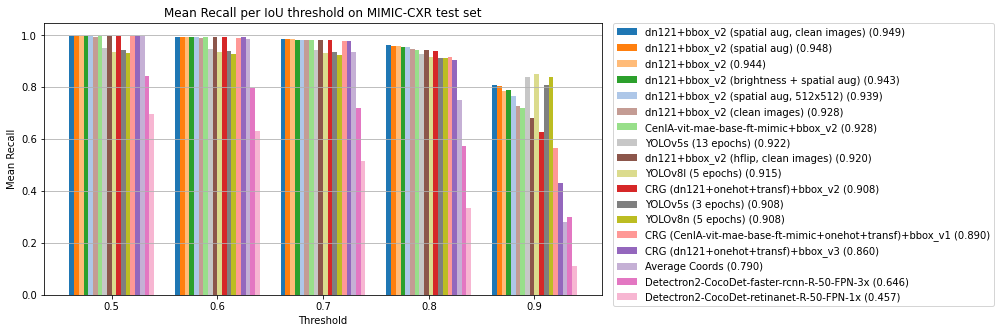

In [131]:
plot_chest_imagenome_bbox_metrics_at_thresholds(
    metrics_paths=[
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230224_065346')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230224_051558')].iloc[0]['metrics_path'],        
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230221_174959')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230215_124027') & (df_bbox_mimiccxr['iou_RL'].notna())].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230216_131111') & (df_bbox_mimiccxr['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230217_040800') & (df_bbox_mimiccxr['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230208_231030')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230209_000803')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230208_231344')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230227_122852')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230227_134559')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230227_130158')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230301_180949')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230316_122709')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230320_180158')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230320_203810')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230331_052620')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230331_073216')].iloc[0]['metrics_path'],        
    ],
    method_aliases=[
        'dn121+bbox_v2 (spatial aug, clean images)',
        'dn121+bbox_v2 (spatial aug, 512x512)',
        'dn121+bbox_v2 (spatial aug)',
        'dn121+bbox_v2',
        'dn121+bbox_v2 (brightness + spatial aug)',
        'CenIA-vit-mae-base-ft-mimic+bbox_v2',
        'CRG (dn121+onehot+transf)+bbox_v2',
        'CRG (CenIA-vit-mae-base-ft-mimic+onehot+transf)+bbox_v1',
        'CRG (dn121+onehot+transf)+bbox_v3',
        'Average Coords',
        'dn121+bbox_v2 (hflip, clean images)',
        'dn121+bbox_v2 (clean images)',
        'Detectron2-CocoDet-faster-rcnn-R-50-FPN-3x',
        'Detectron2-CocoDet-retinanet-R-50-FPN-1x',
        'YOLOv5s (3 epochs)',
        'YOLOv5s (13 epochs)',
        'YOLOv8n (5 epochs)',
        'YOLOv8l (5 epochs)',
    ],
    metric_name='mean_r',
    metric_alias='Mean Recall',
    dataset_name='MIMIC-CXR test set',
    figsize=(10, 5)
)

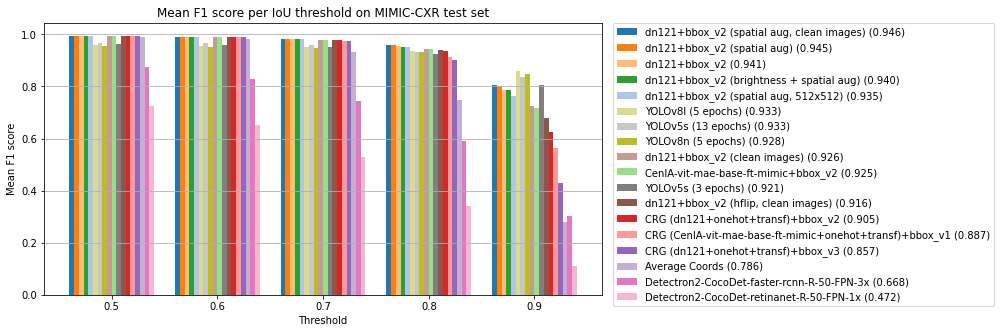

In [132]:
plot_chest_imagenome_bbox_metrics_at_thresholds(
    metrics_paths=[
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230224_065346')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230224_051558')].iloc[0]['metrics_path'],        
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230221_174959')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230215_124027') & (df_bbox_mimiccxr['iou_RL'].notna())].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230216_131111') & (df_bbox_mimiccxr['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230217_040800') & (df_bbox_mimiccxr['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230208_231030')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230209_000803')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230208_231344')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230227_122852')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230227_134559')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230227_130158')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230301_180949')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230316_122709')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230320_180158')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230320_203810')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230331_052620')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230331_073216')].iloc[0]['metrics_path'],        
    ],
    method_aliases=[
        'dn121+bbox_v2 (spatial aug, clean images)',
        'dn121+bbox_v2 (spatial aug, 512x512)',
        'dn121+bbox_v2 (spatial aug)',
        'dn121+bbox_v2',
        'dn121+bbox_v2 (brightness + spatial aug)',
        'CenIA-vit-mae-base-ft-mimic+bbox_v2',
        'CRG (dn121+onehot+transf)+bbox_v2',
        'CRG (CenIA-vit-mae-base-ft-mimic+onehot+transf)+bbox_v1',
        'CRG (dn121+onehot+transf)+bbox_v3',
        'Average Coords',
        'dn121+bbox_v2 (hflip, clean images)',
        'dn121+bbox_v2 (clean images)',
        'Detectron2-CocoDet-faster-rcnn-R-50-FPN-3x',
        'Detectron2-CocoDet-retinanet-R-50-FPN-1x',
        'YOLOv5s (3 epochs)',
        'YOLOv5s (13 epochs)',
        'YOLOv8n (5 epochs)',
        'YOLOv8l (5 epochs)',
    ],
    metric_name='mean_f1',
    metric_alias='Mean F1 score',
    dataset_name='MIMIC-CXR test set',
    figsize=(10, 5)
)

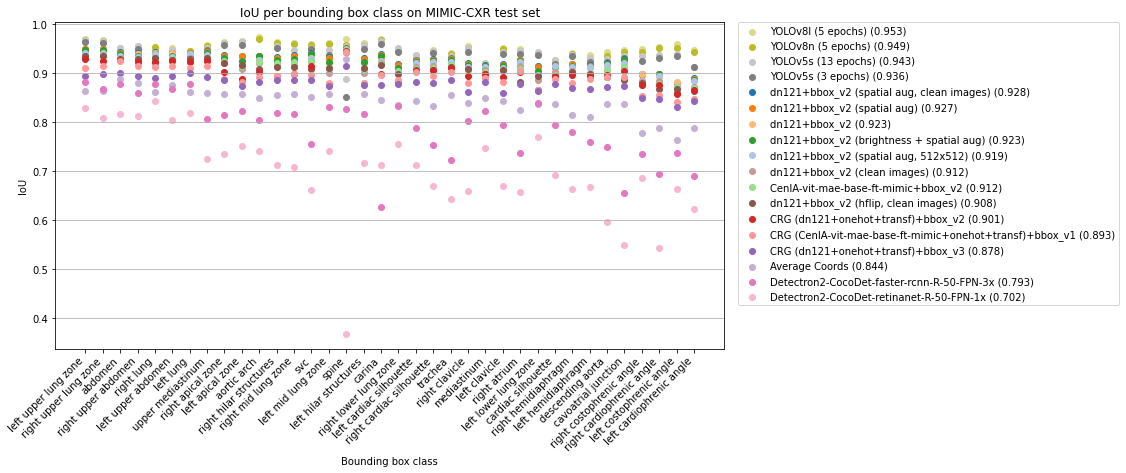

In [133]:
plot_chest_imagenome_bbox_metrics_per_bbox_class(
    metrics_paths=[
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230224_065346')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230224_051558')].iloc[0]['metrics_path'],        
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230221_174959')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230215_124027') & (df_bbox_mimiccxr['iou_RL'].notna())].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230216_131111') & (df_bbox_mimiccxr['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230217_040800') & (df_bbox_mimiccxr['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230208_231030')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230209_000803')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230208_231344')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230227_122852')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230227_134559')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230227_130158')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230301_180949')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230316_122709')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230320_180158')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230320_203810')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230331_052620')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230331_073216')].iloc[0]['metrics_path'],
    ],
    method_aliases=[
        'dn121+bbox_v2 (spatial aug, clean images)',
        'dn121+bbox_v2 (spatial aug, 512x512)',
        'dn121+bbox_v2 (spatial aug)',
        'dn121+bbox_v2',
        'dn121+bbox_v2 (brightness + spatial aug)',
        'CenIA-vit-mae-base-ft-mimic+bbox_v2',
        'CRG (dn121+onehot+transf)+bbox_v2',
        'CRG (CenIA-vit-mae-base-ft-mimic+onehot+transf)+bbox_v1',
        'CRG (dn121+onehot+transf)+bbox_v3',
        'Average Coords',
        'dn121+bbox_v2 (hflip, clean images)',
        'dn121+bbox_v2 (clean images)',
        'Detectron2-CocoDet-faster-rcnn-R-50-FPN-3x',
        'Detectron2-CocoDet-retinanet-R-50-FPN-1x',
        'YOLOv5s (3 epochs)',
        'YOLOv5s (13 epochs)',
        'YOLOv8n (5 epochs)',
        'YOLOv8l (5 epochs)',
    ],
    metric_name='iou',
    metric_alias='IoU',
    dataset_name='MIMIC-CXR test set',
    figsize=(12, 6),
)

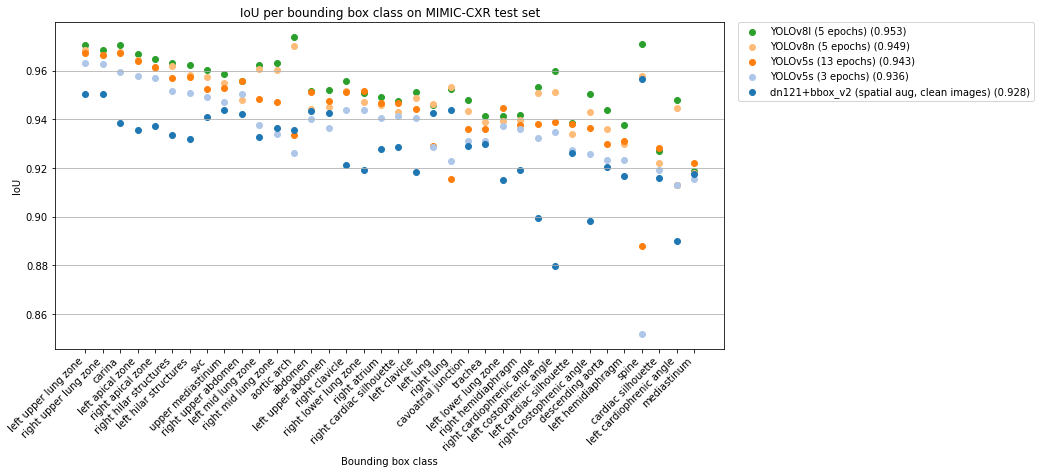

In [134]:
plot_chest_imagenome_bbox_metrics_per_bbox_class(
    metrics_paths=[
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230224_065346')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230224_051558')].iloc[0]['metrics_path'],        
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230221_174959')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230215_124027') & (df_bbox_mimiccxr['iou_RL'].notna())].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230216_131111') & (df_bbox_mimiccxr['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230217_040800') & (df_bbox_mimiccxr['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230208_231030')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230209_000803')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230208_231344')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230227_122852')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230227_134559')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230227_130158')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230301_180949')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230316_122709')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230320_180158')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230320_203810')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230331_052620')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230331_073216')].iloc[0]['metrics_path'],
    ],
    method_aliases=[
        'dn121+bbox_v2 (spatial aug, clean images)',
#         'dn121+bbox_v2 (spatial aug, 512x512)',
#         'dn121+bbox_v2 (spatial aug)',
#         'dn121+bbox_v2',
#         'dn121+bbox_v2 (brightness + spatial aug)',
#         'CenIA-vit-mae-base-ft-mimic+bbox_v2',
#         'CRG (dn121+onehot+transf)+bbox_v2',
#         'CRG (CenIA-vit-mae-base-ft-mimic+onehot+transf)+bbox_v1',
#         'CRG (dn121+onehot+transf)+bbox_v3',
#         'Average Coords',
#         'dn121+bbox_v2 (hflip, clean images)',
#         'dn121+bbox_v2 (clean images)',
#         'Detectron2-CocoDet-faster-rcnn-R-50-FPN-3x',
#         'Detectron2-CocoDet-retinanet-R-50-FPN-1x',
        'YOLOv5s (3 epochs)',
        'YOLOv5s (13 epochs)',
        'YOLOv8n (5 epochs)',
        'YOLOv8l (5 epochs)',
    ],
    metric_name='iou',
    metric_alias='IoU',
    dataset_name='MIMIC-CXR test set',
    figsize=(12, 6),
)

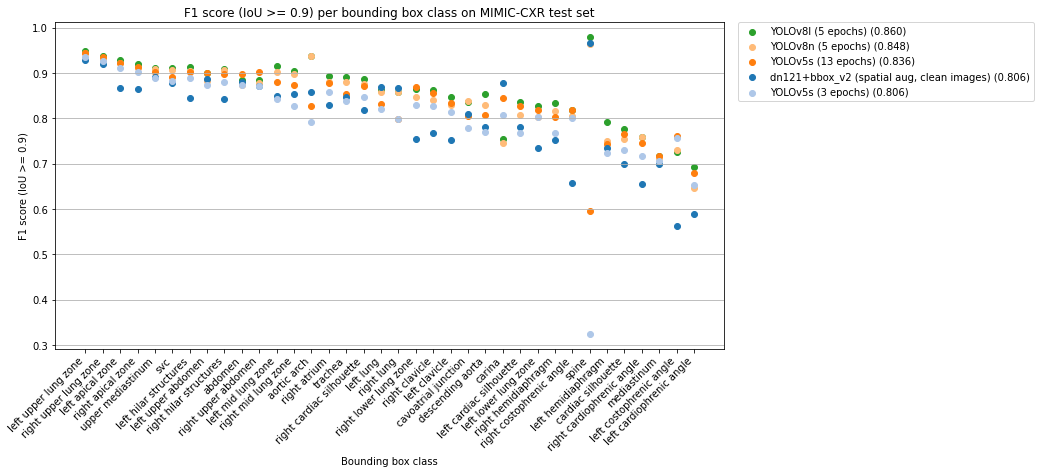

In [135]:
plot_chest_imagenome_bbox_metrics_per_bbox_class(
    metrics_paths=[
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230224_065346')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230224_051558')].iloc[0]['metrics_path'],        
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230221_174959')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230215_124027') & (df_bbox_mimiccxr['iou_RL'].notna())].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230216_131111') & (df_bbox_mimiccxr['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230217_040800') & (df_bbox_mimiccxr['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230208_231030')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230209_000803')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230208_231344')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230227_122852')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230227_134559')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230227_130158')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230301_180949')].iloc[0]['metrics_path'],
#         df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230316_122709')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230320_180158')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230320_203810')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230331_052620')].iloc[0]['metrics_path'],
        df_bbox_mimiccxr.loc[(df_bbox_mimiccxr['timestamp'] == '20230331_073216')].iloc[0]['metrics_path'],
    ],
    method_aliases=[
        'dn121+bbox_v2 (spatial aug, clean images)',
#         'dn121+bbox_v2 (spatial aug, 512x512)',
#         'dn121+bbox_v2 (spatial aug)',
#         'dn121+bbox_v2',
#         'dn121+bbox_v2 (brightness + spatial aug)',
#         'CenIA-vit-mae-base-ft-mimic+bbox_v2',
#         'CRG (dn121+onehot+transf)+bbox_v2',
#         'CRG (CenIA-vit-mae-base-ft-mimic+onehot+transf)+bbox_v1',
#         'CRG (dn121+onehot+transf)+bbox_v3',
#         'Average Coords',
#         'dn121+bbox_v2 (hflip, clean images)',
#         'dn121+bbox_v2 (clean images)',
#         'Detectron2-CocoDet-faster-rcnn-R-50-FPN-3x',
#         'Detectron2-CocoDet-retinanet-R-50-FPN-1x',
        'YOLOv5s (3 epochs)',
        'YOLOv5s (13 epochs)',
        'YOLOv8n (5 epochs)',
        'YOLOv8l (5 epochs)',
    ],
    metric_name='f1@0.9',
    metric_alias='F1 score (IoU >= 0.9)',
    dataset_name='MIMIC-CXR test set',
    figsize=(12, 6),
)

### 2) Chest ImaGenome Gold dataset results

In [136]:
df_bbox_chstimgn = get_chest_imagenome_bbox_metrics_dataframe('chest_imagenome_gold')

100%|██████████| 28/28 [00:00<00:00, 47837.28it/s]
28it [00:00, 776.37it/s]

Loading 28 metrics files...


In [103]:
df_bbox_chstimgn.columns

Index(['metrics_path', 'iou_RL', 'mae_RL', 'iou_RULZ', 'mae_RULZ', 'iou_RMLZ',
       'mae_RMLZ', 'iou_RLLZ', 'mae_RLLZ', 'iou_RHS',
       ...
       'mean_f1', 'folder', 'timestamp', 'datasets', 'model',
       'chstimgn_bbox_model', 'aug', 'eval_mode', 'img_size', 'decent_images'],
      dtype='object', length=642)

In [137]:
# df_aux = df_bbox_chstimgn.sort_values(['mean_iou'], ascending=False)
df_aux = df_bbox_chstimgn.sort_values(['timestamp'], ascending=False)
df_aux = df_aux[['timestamp', 'folder', 'datasets', 'model', 'chstimgn_bbox_model', 'aug', 'eval_mode',
#         'meanr', 'meanp', 'meanf1', 'f1@0.9', 'f1@0.8', 'f1@0.7', 'f1@0.6', 'f1@0.5', 'iou', 'mae',
        'mean_r', 'mean_p', 'mean_f1', 'mean_r@0.9', 'mean_r@0.8', 'mean_r@0.7', 'mean_r@0.6', 'mean_r@0.5', 'mean_iou', 'mean_mae',
       ]]
df_aux

,timestamp,folder,datasets,model,chstimgn_bbox_model,aug,eval_mode,mean_r,mean_p,mean_f1,mean_r@0.9,mean_r@0.8,mean_r@0.7,mean_r@0.6,mean_r@0.5,mean_iou,mean_mae
19,20230331_073241,visual_module,1:chest-imagenome,yolov8,None,None,****************,0.959709,0.987413,0.972637,0.933597,0.961954,0.966585,0.967923,0.968486,0.970379,0.009590
25,20230331_065249,visual_module,1:chest-imagenome,yolov8,None,None,****************,0.957149,0.986302,0.970705,0.927602,0.959475,0.965093,0.966431,0.967146,0.968006,0.010327
16,20230331_052721,visual_module,1:chest-imagenome,yolov8,None,None,****************,0.957149,0.986302,0.970705,0.927602,0.959475,0.965093,0.966431,0.967146,0.968006,0.010327
8,20230320_203928,visual_module,1:chest-imagenome,yolov5,None,None,****************,0.962184,0.979310,0.970147,0.930701,0.964836,0.970451,0.972068,0.972865,0.963779,0.011957
10,20230320_181651,visual_module,1:chest-imagenome,yolov5,None,None,****************,0.961786,0.977348,0.969005,0.924467,0.965323,0.971587,0.973281,0.974271,0.958733,0.013632
18,20230316_122709,visual_module,1:mim,D2-CocoDet-retinanet-R-50-FPN-1x,None,mim: None,"chest_imagenome_trained_model,clamped,decent",0.562956,0.607713,0.578236,0.149456,0.444321,0.651660,0.760119,0.809224,0.730544,8.207933
13,20230302_142857,visual_module,1:mim,dn121,v2,mim: random-spatial,"chest_imagenome_trained_model,clamped",0.973640,0.976175,0.974904,0.907332,0.980995,0.990585,0.993821,0.995468,0.943476,0.019094
9,20230302_080016,visual_module,1:mim,dn121,v2,mim: random-spatial,"chest_imagenome_trained_model,clamped",0.958051,0.960234,0.959138,0.836465,0.974414,0.989304,0.994074,0.995998,0.927604,0.023815
20,20230301_180949,visual_module,1:mim,D2-CocoDet-faster-rcnn-R-50-FPN-3x,v1,mim: None,"chest_imagenome_trained_model,clamped,decent",0.754953,0.786855,0.769782,0.425366,0.714168,0.830414,0.888106,0.916713,0.837593,5.105461
17,20230227_134559,visual_module,1:mim,dn121,v2,mim: horizontal-flip,"chest_imagenome_trained_model,clamped",0.953859,0.956149,0.955000,0.813081,0.975338,0.990458,0.994421,0.995998,0.925642,0.024317


In [121]:
reload(medvqa.evaluation.plots)

<module 'medvqa.evaluation.plots' from '/home/pamessina/medvqa/medvqa/evaluation/plots.py'>

In [105]:
from medvqa.evaluation.plots import (
    plot_chest_imagenome_bbox_metrics_at_thresholds,
    plot_chest_imagenome_bbox_metrics_per_bbox_class,
)

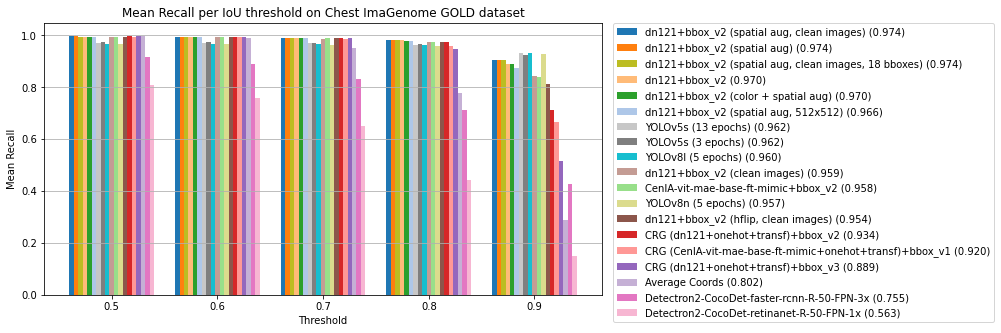

In [138]:
plot_chest_imagenome_bbox_metrics_at_thresholds(
    metrics_paths=[
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230224_065346')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230224_051558')].iloc[0]['metrics_path'],        
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230221_174959')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230215_124027') & (df_bbox_chstimgn['iou_RL'].notna())].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230216_131111') & (df_bbox_chstimgn['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230217_040800') & (df_bbox_chstimgn['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230208_231030')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230209_000803')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230208_231344')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_122901')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_134559')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_130158')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230301_180949')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230316_122709')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230320_181651')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230320_203928')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230302_142857')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230331_052721')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230331_073241')].iloc[0]['metrics_path'],
    ],
    method_aliases=[
        'dn121+bbox_v2 (spatial aug, clean images)',
        'dn121+bbox_v2 (spatial aug, 512x512)',
        'dn121+bbox_v2 (spatial aug)',
        'dn121+bbox_v2',
        'dn121+bbox_v2 (color + spatial aug)',
        'CenIA-vit-mae-base-ft-mimic+bbox_v2',
        'CRG (dn121+onehot+transf)+bbox_v2',
        'CRG (CenIA-vit-mae-base-ft-mimic+onehot+transf)+bbox_v1',
        'CRG (dn121+onehot+transf)+bbox_v3',
        'Average Coords',
        'dn121+bbox_v2 (hflip, clean images)',
        'dn121+bbox_v2 (clean images)',
        'Detectron2-CocoDet-faster-rcnn-R-50-FPN-3x',
        'Detectron2-CocoDet-retinanet-R-50-FPN-1x',
        'YOLOv5s (3 epochs)',
        'YOLOv5s (13 epochs)',
        'dn121+bbox_v2 (spatial aug, clean images, 18 bboxes)',
        'YOLOv8n (5 epochs)',
        'YOLOv8l (5 epochs)',
    ],
    metric_name='mean_r',
    metric_alias='Mean Recall',
    dataset_name='Chest ImaGenome GOLD dataset',
    figsize=(10, 5)
)

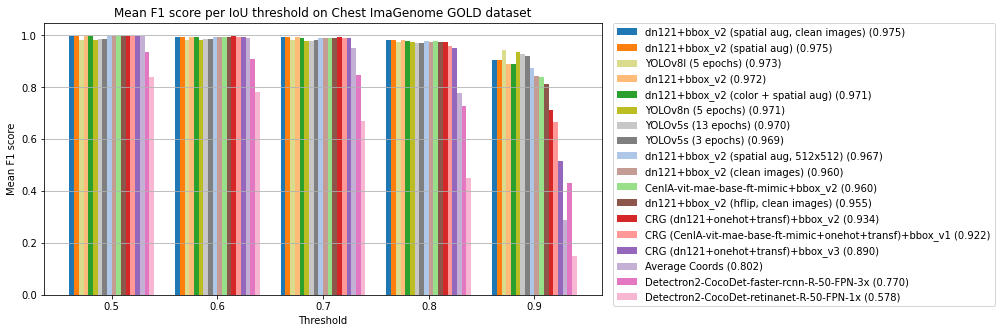

In [139]:
plot_chest_imagenome_bbox_metrics_at_thresholds(
    metrics_paths=[
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230224_065346')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230224_051558')].iloc[0]['metrics_path'],        
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230221_174959')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230215_124027') & (df_bbox_chstimgn['iou_RL'].notna())].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230216_131111') & (df_bbox_chstimgn['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230217_040800') & (df_bbox_chstimgn['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230208_231030')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230209_000803')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230208_231344')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_122901')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_134559')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_130158')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230301_180949')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230316_122709')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230320_181651')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230320_203928')].iloc[0]['metrics_path'],
#         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230302_142857')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230331_052721')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230331_073241')].iloc[0]['metrics_path'],
    ],
    method_aliases=[
        'dn121+bbox_v2 (spatial aug, clean images)',
        'dn121+bbox_v2 (spatial aug, 512x512)',
        'dn121+bbox_v2 (spatial aug)',
        'dn121+bbox_v2',
        'dn121+bbox_v2 (color + spatial aug)',
        'CenIA-vit-mae-base-ft-mimic+bbox_v2',
        'CRG (dn121+onehot+transf)+bbox_v2',
        'CRG (CenIA-vit-mae-base-ft-mimic+onehot+transf)+bbox_v1',
        'CRG (dn121+onehot+transf)+bbox_v3',
        'Average Coords',
        'dn121+bbox_v2 (hflip, clean images)',
        'dn121+bbox_v2 (clean images)',
        'Detectron2-CocoDet-faster-rcnn-R-50-FPN-3x',
        'Detectron2-CocoDet-retinanet-R-50-FPN-1x',
        'YOLOv5s (3 epochs)',
        'YOLOv5s (13 epochs)',
#         'dn121+bbox_v2 (spatial aug, clean images, 18 bboxes)',
        'YOLOv8n (5 epochs)',
        'YOLOv8l (5 epochs)',
    ],
    metric_name='mean_f1',
    metric_alias='Mean F1 score',
    dataset_name='Chest ImaGenome GOLD dataset',
    figsize=(10, 5)
)

In [23]:
reload(medvqa.evaluation.plots)

<module 'medvqa.evaluation.plots' from '/home/pamessina/medvqa/medvqa/evaluation/plots.py'>

In [24]:
from medvqa.evaluation.plots import (
    plot_chest_imagenome_bbox_metrics_at_thresholds,
    plot_chest_imagenome_bbox_metrics_per_bbox_class,
)

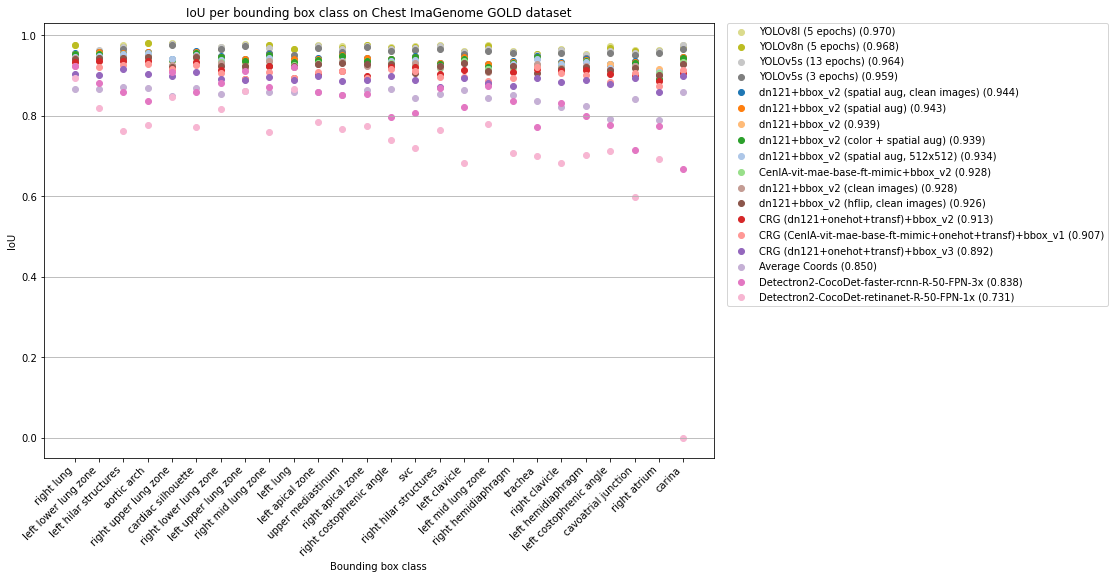

In [140]:
plot_chest_imagenome_bbox_metrics_per_bbox_class(
    metrics_paths=[
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230224_065346')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230224_051558')].iloc[0]['metrics_path'],        
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230221_174959')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230215_124027') & (df_bbox_chstimgn['iou_RL'].notna())].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230216_131111') & (df_bbox_chstimgn['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230217_040800') & (df_bbox_chstimgn['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230208_231030')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230209_000803')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230208_231344')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_122901')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_134559')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_130158')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230301_180949')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230316_122709')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230320_181651')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230320_203928')].iloc[0]['metrics_path'],
#         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230302_142857')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230331_052721')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230331_073241')].iloc[0]['metrics_path'],
    ],
    method_aliases=[
        'dn121+bbox_v2 (spatial aug, clean images)',
        'dn121+bbox_v2 (spatial aug, 512x512)',
        'dn121+bbox_v2 (spatial aug)',
        'dn121+bbox_v2',
        'dn121+bbox_v2 (color + spatial aug)',
        'CenIA-vit-mae-base-ft-mimic+bbox_v2',
        'CRG (dn121+onehot+transf)+bbox_v2',
        'CRG (CenIA-vit-mae-base-ft-mimic+onehot+transf)+bbox_v1',
        'CRG (dn121+onehot+transf)+bbox_v3',
        'Average Coords',
        'dn121+bbox_v2 (hflip, clean images)',
        'dn121+bbox_v2 (clean images)',
        'Detectron2-CocoDet-faster-rcnn-R-50-FPN-3x',
        'Detectron2-CocoDet-retinanet-R-50-FPN-1x',
        'YOLOv5s (3 epochs)',
        'YOLOv5s (13 epochs)',
#         'dn121+bbox_v2 (spatial aug, clean images, 18 bboxes)',
        'YOLOv8n (5 epochs)',
        'YOLOv8l (5 epochs)',
    ],
    metric_name='iou',
    metric_alias='IoU',
    dataset_name='Chest ImaGenome GOLD dataset',
    figsize=(12, 8)
)

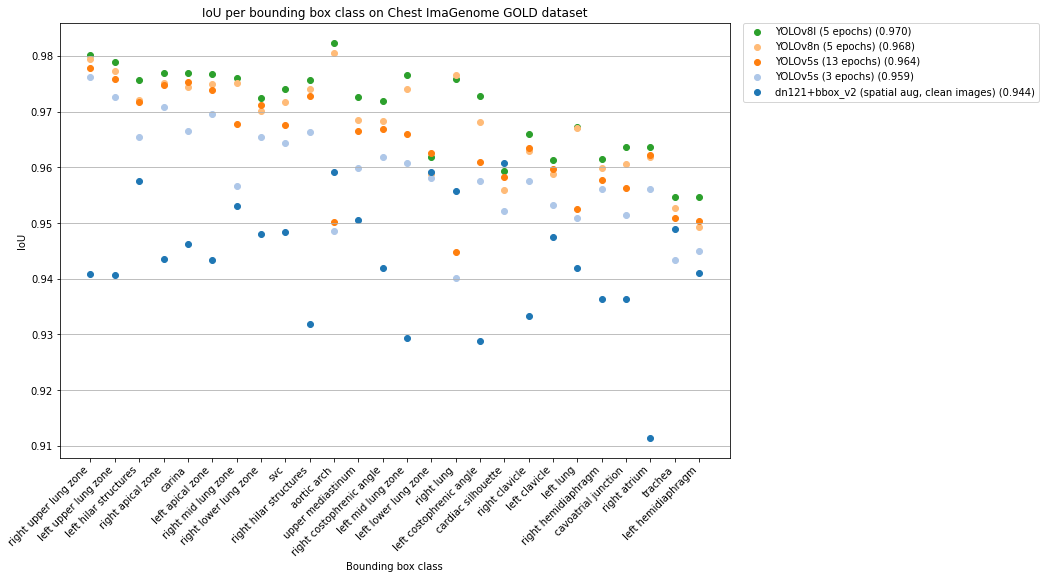

In [141]:
plot_chest_imagenome_bbox_metrics_per_bbox_class(
    metrics_paths=[
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230224_065346')].iloc[0]['metrics_path'],
#         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230224_051558')].iloc[0]['metrics_path'],        
#         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230221_174959')].iloc[0]['metrics_path'],
#         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230215_124027') & (df_bbox_chstimgn['iou_RL'].notna())].iloc[0]['metrics_path'],
#         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230216_131111') & (df_bbox_chstimgn['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
#         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230217_040800') & (df_bbox_chstimgn['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
#         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230208_231030')].iloc[0]['metrics_path'],
#         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230209_000803')].iloc[0]['metrics_path'],
#         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230208_231344')].iloc[0]['metrics_path'],
#         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_122901')].iloc[0]['metrics_path'],
#         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_134559')].iloc[0]['metrics_path'],
#         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_130158')].iloc[0]['metrics_path'],
#         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230301_180949')].iloc[0]['metrics_path'],
#         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230316_122709')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230320_181651')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230320_203928')].iloc[0]['metrics_path'],
#         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230302_142857')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230331_052721')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230331_073241')].iloc[0]['metrics_path'],
    ],
    method_aliases=[
        'dn121+bbox_v2 (spatial aug, clean images)',
#         'dn121+bbox_v2 (spatial aug, 512x512)',
#         'dn121+bbox_v2 (spatial aug)',
#         'dn121+bbox_v2',
#         'dn121+bbox_v2 (color + spatial aug)',
#         'CenIA-vit-mae-base-ft-mimic+bbox_v2',
#         'CRG (dn121+onehot+transf)+bbox_v2',
#         'CRG (CenIA-vit-mae-base-ft-mimic+onehot+transf)+bbox_v1',
#         'CRG (dn121+onehot+transf)+bbox_v3',
#         'Average Coords',
#         'dn121+bbox_v2 (hflip, clean images)',
#         'dn121+bbox_v2 (clean images)',
#         'Detectron2-CocoDet-faster-rcnn-R-50-FPN-3x',
#         'Detectron2-CocoDet-retinanet-R-50-FPN-1x',
        'YOLOv5s (3 epochs)',
        'YOLOv5s (13 epochs)',
#         'dn121+bbox_v2 (spatial aug, clean images, 18 bboxes)',
        'YOLOv8n (5 epochs)',
        'YOLOv8l (5 epochs)',
    ],
    metric_name='iou',
    metric_alias='IoU',
    dataset_name='Chest ImaGenome GOLD dataset',
    figsize=(12, 8)
)

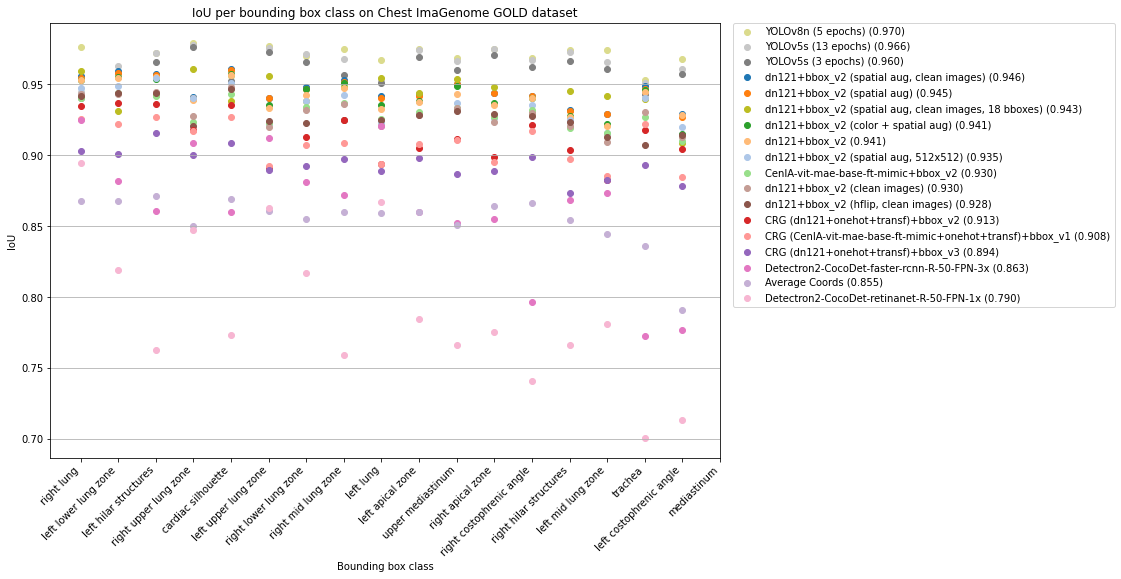

In [112]:
plot_chest_imagenome_bbox_metrics_per_bbox_class(
    metrics_paths=[
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230224_065346')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230224_051558')].iloc[0]['metrics_path'],        
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230221_174959')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230215_124027') & (df_bbox_chstimgn['iou_RL'].notna())].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230216_131111') & (df_bbox_chstimgn['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230217_040800') & (df_bbox_chstimgn['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230208_231030')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230209_000803')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230208_231344')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_122901')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_134559')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_130158')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230301_180949')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230316_122709')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230320_181651')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230320_203928')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230302_142857')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230331_052721')].iloc[0]['metrics_path'],
        #         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230302_142857')].iloc[0]['metrics_path'],
    ],
    method_aliases=[
        'dn121+bbox_v2 (spatial aug, clean images)',
        'dn121+bbox_v2 (spatial aug, 512x512)',
        'dn121+bbox_v2 (spatial aug)',
        'dn121+bbox_v2',
        'dn121+bbox_v2 (color + spatial aug)',
        'CenIA-vit-mae-base-ft-mimic+bbox_v2',
        'CRG (dn121+onehot+transf)+bbox_v2',
        'CRG (CenIA-vit-mae-base-ft-mimic+onehot+transf)+bbox_v1',
        'CRG (dn121+onehot+transf)+bbox_v3',
        'Average Coords',
        'dn121+bbox_v2 (hflip, clean images)',
        'dn121+bbox_v2 (clean images)',
        'Detectron2-CocoDet-faster-rcnn-R-50-FPN-3x',
        'Detectron2-CocoDet-retinanet-R-50-FPN-1x',
        'YOLOv5s (3 epochs)',
        'YOLOv5s (13 epochs)',
        'dn121+bbox_v2 (spatial aug, clean images, 18 bboxes)',
        'YOLOv8n (5 epochs)',
        #         'dn121+bbox_v2 (spatial aug, clean images, 18 bboxes)',
    ],
    metric_name='iou',
    metric_alias='IoU',
    dataset_name='Chest ImaGenome GOLD dataset',
    bbox_class_names=medvqa.datasets.chest_imagenome.ANAXNET_BBOX_NAMES,
    figsize=(12, 8)
)

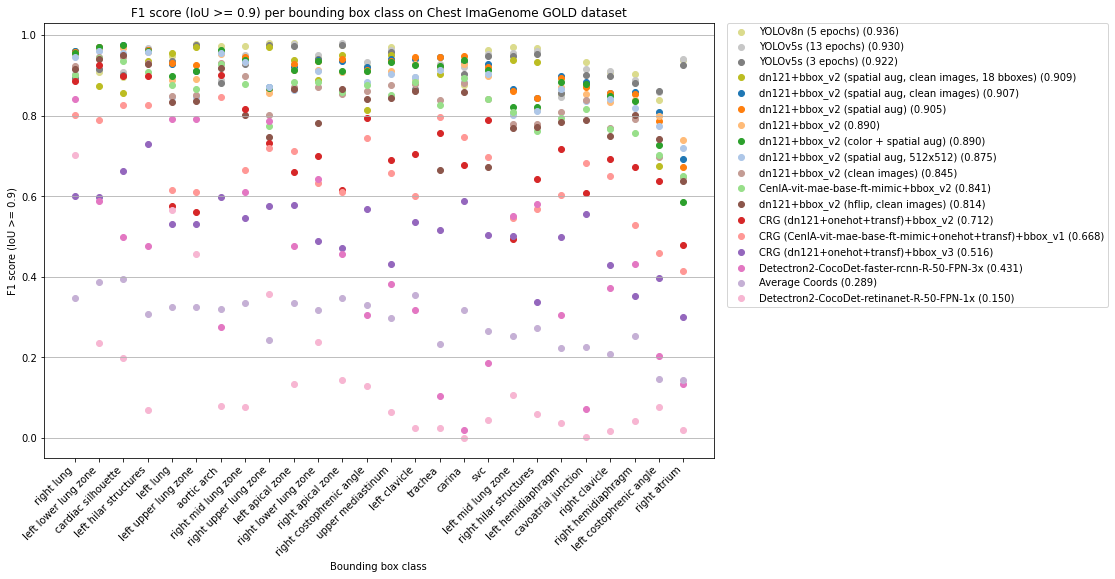

In [113]:
plot_chest_imagenome_bbox_metrics_per_bbox_class(
    metrics_paths=[
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230224_065346')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230224_051558')].iloc[0]['metrics_path'],        
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230221_174959')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230215_124027') & (df_bbox_chstimgn['iou_RL'].notna())].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230216_131111') & (df_bbox_chstimgn['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230217_040800') & (df_bbox_chstimgn['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230208_231030')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230209_000803')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230208_231344')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_122901')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_134559')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_130158')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230301_180949')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230316_122709')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230320_181651')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230320_203928')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230302_142857')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230331_052721')].iloc[0]['metrics_path'],
        #         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230302_142857')].iloc[0]['metrics_path'],
    ],
    method_aliases=[
        'dn121+bbox_v2 (spatial aug, clean images)',
        'dn121+bbox_v2 (spatial aug, 512x512)',
        'dn121+bbox_v2 (spatial aug)',
        'dn121+bbox_v2',
        'dn121+bbox_v2 (color + spatial aug)',
        'CenIA-vit-mae-base-ft-mimic+bbox_v2',
        'CRG (dn121+onehot+transf)+bbox_v2',
        'CRG (CenIA-vit-mae-base-ft-mimic+onehot+transf)+bbox_v1',
        'CRG (dn121+onehot+transf)+bbox_v3',
        'Average Coords',
        'dn121+bbox_v2 (hflip, clean images)',
        'dn121+bbox_v2 (clean images)',
        'Detectron2-CocoDet-faster-rcnn-R-50-FPN-3x',
        'Detectron2-CocoDet-retinanet-R-50-FPN-1x',
        'YOLOv5s (3 epochs)',
        'YOLOv5s (13 epochs)',
        'dn121+bbox_v2 (spatial aug, clean images, 18 bboxes)',
        'YOLOv8n (5 epochs)',
        #         'dn121+bbox_v2 (spatial aug, clean images, 18 bboxes)',
    ],
    metric_name='f1@0.9',
    metric_alias='F1 score (IoU >= 0.9)',
    dataset_name='Chest ImaGenome GOLD dataset',
    figsize=(12, 8)
)

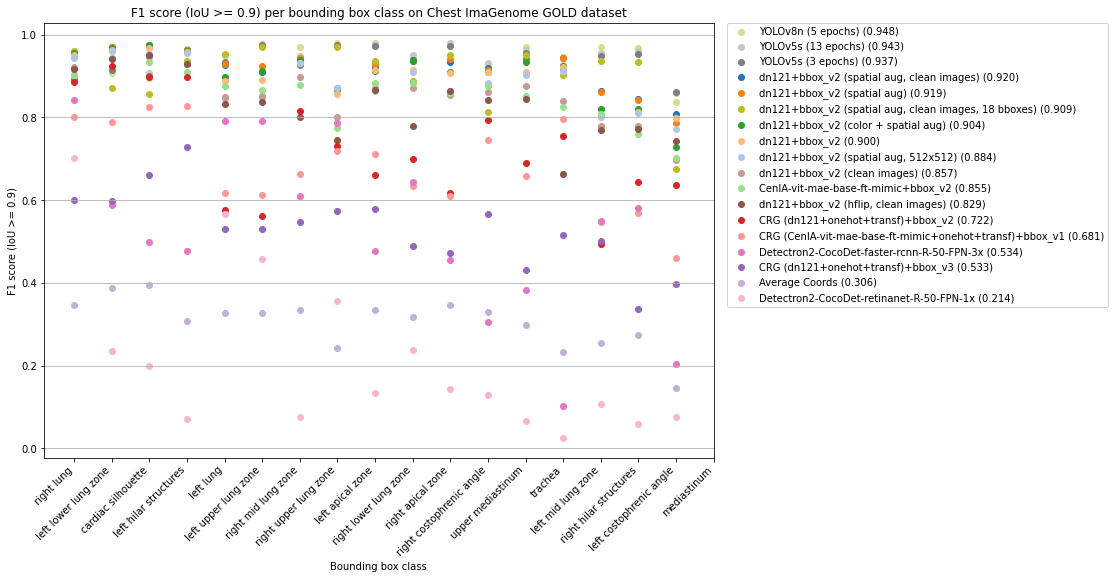

In [114]:
plot_chest_imagenome_bbox_metrics_per_bbox_class(
    metrics_paths=[
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230224_065346')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230224_051558')].iloc[0]['metrics_path'],        
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230221_174959')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230215_124027') & (df_bbox_chstimgn['iou_RL'].notna())].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230216_131111') & (df_bbox_chstimgn['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230217_040800') & (df_bbox_chstimgn['eval_mode'].str.contains('clamped'))].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230208_231030')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230209_000803')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230208_231344')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_122901')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_134559')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230227_130158')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230301_180949')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230316_122709')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230320_181651')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230320_203928')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230302_142857')].iloc[0]['metrics_path'],
        df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230331_052721')].iloc[0]['metrics_path'],
        #         df_bbox_chstimgn.loc[(df_bbox_chstimgn['timestamp'] == '20230302_142857')].iloc[0]['metrics_path'],
    ],
    method_aliases=[
        'dn121+bbox_v2 (spatial aug, clean images)',
        'dn121+bbox_v2 (spatial aug, 512x512)',
        'dn121+bbox_v2 (spatial aug)',
        'dn121+bbox_v2',
        'dn121+bbox_v2 (color + spatial aug)',
        'CenIA-vit-mae-base-ft-mimic+bbox_v2',
        'CRG (dn121+onehot+transf)+bbox_v2',
        'CRG (CenIA-vit-mae-base-ft-mimic+onehot+transf)+bbox_v1',
        'CRG (dn121+onehot+transf)+bbox_v3',
        'Average Coords',
        'dn121+bbox_v2 (hflip, clean images)',
        'dn121+bbox_v2 (clean images)',
        'Detectron2-CocoDet-faster-rcnn-R-50-FPN-3x',
        'Detectron2-CocoDet-retinanet-R-50-FPN-1x',
        'YOLOv5s (3 epochs)',
        'YOLOv5s (13 epochs)',
        'dn121+bbox_v2 (spatial aug, clean images, 18 bboxes)',
        'YOLOv8n (5 epochs)',
        #         'dn121+bbox_v2 (spatial aug, clean images, 18 bboxes)',
    ],
    metric_name='f1@0.9',
    metric_alias='F1 score (IoU >= 0.9)',
    dataset_name='Chest ImaGenome GOLD dataset',
    bbox_class_names=medvqa.datasets.chest_imagenome.ANAXNET_BBOX_NAMES,
    figsize=(12, 8)
)

# Chest ImaGenome Multi-label classification results

In [1]:
from importlib import reload
import medvqa

In [118]:
reload(medvqa.evaluation.visual_module)
reload(medvqa.evaluation.results)
# reload(medvqa.evaluation.plots)

<module 'medvqa.evaluation.results' from '/home/pamessina/medvqa/medvqa/evaluation/results.py'>

## 1) MIMIC-CXR test set

In [119]:
from medvqa.evaluation.results import get_chest_imagenome_multilabel_classification_metrics_dataframe

In [120]:
df_mlc_chstimgn = get_chest_imagenome_multilabel_classification_metrics_dataframe('mimiccxr_test_set')

100%|██████████| 26/26 [00:00<00:00, 2243.08it/s]


In [121]:
df_mlc_chstimgn.columns

Index(['metrics_path', 'num_labels', 'acc', 'f1(macro)', 'p(macro)',
       'r(macro)', 'f1(micro)', 'p(micro)', 'r(micro)',
       'f1(abdomen sub-diaphragmatic air)',
       ...
       'model', 'chstimgn_bbox_model', 'chstimgn_mlc_model', 'aug',
       'decent_images', 'binary_loss', 'mimiccxr_balanced_sampling', 'history',
       'escheat', 'num_ens'],
      dtype='object', length=3790)

In [122]:
# df_aux = df_mlc_chstimgn.sort_values(['f1(macro)'], ascending=False)
df_aux = df_mlc_chstimgn.sort_values(['timestamp'], ascending=False)
df_aux = df_aux[[
    'timestamp',
    'folder', 'datasets', 'model', 'chstimgn_mlc_model', 'chstimgn_bbox_model', 'num_labels', 'aug', 'decent_images', 
    'binary_loss', 'mimiccxr_balanced_sampling', 'history', 'escheat', 'num_ens',
    'f1(macro)', 'f1(micro)', 'rocauc(macro)', 'rocauc(micro)', 'acc',
]]
# 20230303_064112
df_aux

,timestamp,folder,datasets,model,chstimgn_mlc_model,chstimgn_bbox_model,num_labels,aug,decent_images,binary_loss,mimiccxr_balanced_sampling,history,escheat,num_ens,f1(macro),f1(micro),rocauc(macro),rocauc(micro),acc
4,20230330_030238,visual_module,1:mim,dn121,v4,v4,379,mim: random-spatial,True,wbce-c,balanced_chest_imagenome_global_labels_batchwise,hlen=13 nte=21837000 ft_from=20230303_064112,False,NaN,0.239223,0.471760,0.789000,0.874497,0.893361
19,20230327_160546,visual_module,1:mim,dn121,v4_1,None,379,mim: None,True,wbce-c,None,hlen=11 nte=18381000 ft_from=20230208_231030,False,NaN,0.217799,0.433620,0.769779,0.867887,0.880760
18,20230327_151837,visual_module,1:mim,dn121,v6,v6,379,mim: None,True,wbce-c,None,hlen=11 nte=19179000 ft_from=20230208_231030,False,NaN,0.211119,0.444217,0.760848,0.863175,0.881167
10,20230324_093504,visual_module,1:mim,dn121,v4,v4,379,mim: None,True,focal+bce+wbce-c,balanced_chest_imagenome_global_labels_batchwise,hlen=11 nte=19032000 ft_from=20230208_231030,False,NaN,0.210109,0.431361,0.764063,0.903357,0.882135
22,20230324_090628,visual_module,1:mim,dn121,v5,None,379,mim: None,True,focal+bce+wbce-c,balanced_chest_imagenome_global_labels_batchwise,hlen=11 nte=18780000 ft_from=20230208_231030,False,NaN,0.208135,0.424602,0.752737,0.897611,0.878139
23,20230323_234145,visual_module,1:chest-imagenome,ensemble,None,None,379,None,None,None,None,None,True,16.0,0.298402,0.538022,0.789491,0.875632,0.918932
5,20230323_233120,visual_module,1:chest-imagenome,ensemble,None,None,379,None,None,None,None,None,False,16.0,0.223680,0.506419,0.773725,0.864301,0.913409
6,20230323_181539,visual_module,1:mim,dn121,v5,None,379,mim: random-color-and-spatial,True,focal+bce+wbce-c,None,hlen=13 nte=20166000 ft_from=20230323_143952,False,NaN,0.212207,0.421208,0.761371,0.905295,0.874986
25,20230323_153204,visual_module,1:mim,dn121,v5,None,379,mim: None,True,focal+bce+wbce-c,None,hlen=12 nte=19893000 ft_from=20230323_120054,False,NaN,0.207099,0.418471,0.741963,0.866146,0.874255
16,20230323_143952,visual_module,1:mim,dn121,v5,None,379,mim: random-color-and-spatial,True,focal+bce+wbce-c,None,hlen=12 nte=19662000 ft_from=20230323_115911,False,NaN,0.211698,0.424055,0.760890,0.875898,0.876413


In [125]:
df_aux = df_mlc_chstimgn.sort_values(['timestamp'], ascending=False)
df_aux = df_aux[[
    'timestamp',
    'folder', 'datasets', 'model', 'num_labels',
#                  'auc(lung opacity)',
#                  'auc(pleural effusion)',
#                  'auc(atelectasis)',
#                  'auc(enlarged cardiac silhouette)',
#                  'auc(pulmonary edema/hazy opacity)',
#                  'auc(pneumothorax)',
#                  'auc(consolidation)',
#                  'auc(fluid overload/heart failure)',
#                  'auc(pneumonia)',
                 'f1(lung opacity)',
                 'f1(pleural effusion)',
                 'f1(atelectasis)',
                 'f1(enlarged cardiac silhouette)',
                 'f1(pulmonary edema/hazy opacity)',
                 'f1(pneumothorax)',
                 'f1(consolidation)',
                 'f1(fluid overload/heart failure)',
                 'f1(pneumonia)',
#                  'prcauc(lung opacity)',
#                  'prcauc(pleural effusion)',
#                  'prcauc(atelectasis)',
#                  'prcauc(enlarged cardiac silhouette)',
#                  'prcauc(pulmonary edema/hazy opacity)',
#                  'prcauc(pneumothorax)',
#                  'prcauc(consolidation)',
#                  'prcauc(fluid overload/heart failure)',
#                  'prcauc(pneumonia)',
       ]]
df_aux

,timestamp,folder,datasets,model,num_labels,f1(lung opacity),f1(pleural effusion),f1(atelectasis),f1(enlarged cardiac silhouette),f1(pulmonary edema/hazy opacity),f1(pneumothorax),f1(consolidation),f1(fluid overload/heart failure),f1(pneumonia)
4,20230330_030238,visual_module,1:mim,dn121,379,0.920171,0.738603,0.620873,0.709494,0.570317,0.223214,0.299582,0.173124,0.423000
19,20230327_160546,visual_module,1:mim,dn121,379,0.911780,0.725503,0.617823,0.693518,0.568239,0.140845,0.277904,0.180791,0.427245
18,20230327_151837,visual_module,1:mim,dn121,379,0.918516,0.724888,0.607996,0.698059,0.567061,0.142180,0.253863,0.166667,0.433189
10,20230324_093504,visual_module,1:mim,dn121,379,0.913452,0.731278,0.620133,0.694362,0.535245,0.164384,0.283548,0.190107,0.418171
22,20230324_090628,visual_module,1:mim,dn121,379,0.911316,0.723938,0.600514,0.687062,0.552838,0.153846,0.256459,0.176329,0.420022
23,20230323_234145,visual_module,1:chest-imagenome,ensemble,379,0.920443,0.744501,0.630250,0.710600,0.596634,0.284644,0.325254,0.208394,0.445665
5,20230323_233120,visual_module,1:chest-imagenome,ensemble,379,0.919108,0.739496,0.625627,0.695738,0.579361,0.158730,0.308134,0.156171,0.431231
6,20230323_181539,visual_module,1:mim,dn121,379,0.914467,0.723243,0.604663,0.691405,0.549493,0.177778,0.248726,0.162651,0.420874
25,20230323_153204,visual_module,1:mim,dn121,379,0.912892,0.714022,0.601099,0.685996,0.550497,0.189300,0.250000,0.165563,0.397992
16,20230323_143952,visual_module,1:mim,dn121,379,0.912670,0.723475,0.608290,0.688222,0.565217,0.177914,0.275530,0.166503,0.417950


In [58]:
reload(medvqa.evaluation.visual_module)
reload(medvqa.evaluation.results)
reload(medvqa.evaluation.plots)
reload(medvqa.datasets.mimiccxr)
reload(medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management)

<module 'medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management' from '/home/pamessina/medvqa/medvqa/datasets/chest_imagenome/chest_imagenome_dataset_management.py'>

In [126]:
from medvqa.evaluation.plots import plot_multilabel_classification_metrics, plot_per_class_classification_metrics
from medvqa.utils.constants import MetricNames

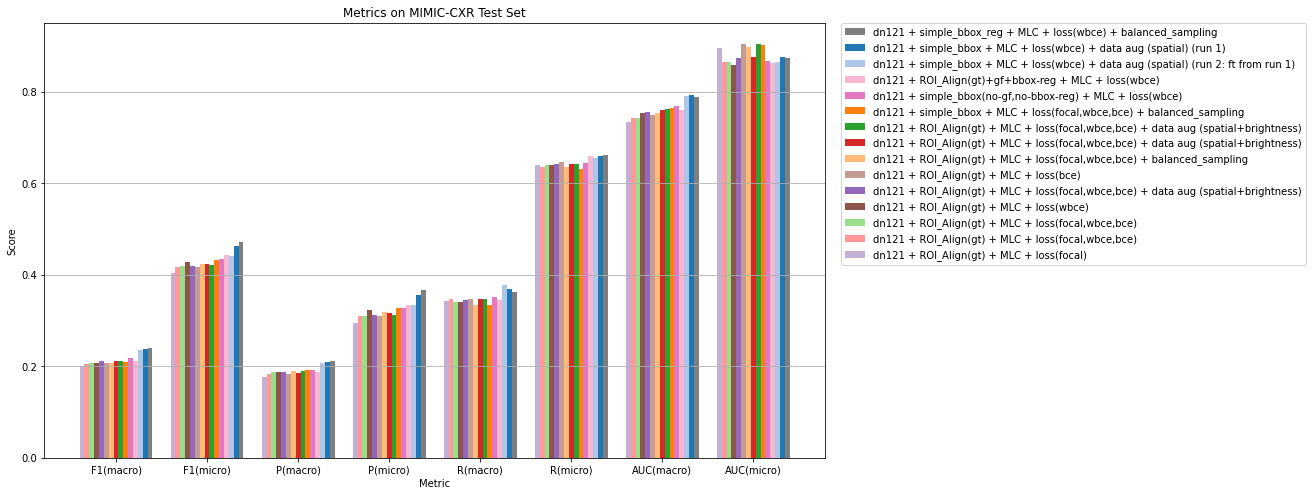

In [127]:
plot_multilabel_classification_metrics(
    metrics_paths=[
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230208_231030')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230302_221214')].iloc[0]['metrics_path'],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230303_064112')].iloc[0]['metrics_path'],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230304_140940')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230313_145330')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_073645')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_110248')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_122703')].iloc[0]['metrics_path'],        
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_142409')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_143409')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_143905')].iloc[0]['metrics_path'],
        # ROI align methods        
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230324_093504')].iloc[0]['metrics_path'],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230324_090628')].iloc[0]['metrics_path'],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_181539')].iloc[0]['metrics_path'],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_153204')].iloc[0]['metrics_path'],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_143952')].iloc[0]['metrics_path'],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_120054')].iloc[0]['metrics_path'],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_115911')].iloc[0]['metrics_path'],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_002558')].iloc[0]['metrics_path'],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_000616')].iloc[0]['metrics_path'],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230322_235415')].iloc[0]['metrics_path'],
        
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230327_160546')].iloc[0]['metrics_path'],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230327_151837')].iloc[0]['metrics_path'],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230330_030238')].iloc[0]['metrics_path'],
    ],
    method_aliases=[
#         '(1)  vqa(dn121+onehot+transf),mlc:gf,nl:627,bbox:v2',
#         '(2)  dn121,mlc:gf,nl:379,aug:rand-bright-spatial,ft-from:(1)',
        'dn121 + simple_bbox + MLC + loss(wbce) + data aug (spatial) (run 1)',  #'(3)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,ft-from:(2)',
        'dn121 + simple_bbox + MLC + loss(wbce) + data aug (spatial) (run 2: ft from run 1)',#'(4)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,ft-from:(3)',
#         '(5)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,balanced-dataload,ft-from:(4)',
#         '(6)  dn121,mlc:gf,nl:379,aug:rand-spatial,focal-loss,ft-from:(1)',
#         '(7)  dn121,mlc:gf,nl:379,aug:rand-bright-spatial,focal-loss,ft-from:(6)',
#         '(8)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,focal-loss,ft-from:(4)',
#         '(9)  ensemble:1-8,nl:379',
#         '(10) ensemble:1-8,nl:379 (cheating)',
#         '(11) ensemble:2-8,nl:379',
        # ROI align methods
        'dn121 + simple_bbox + MLC + loss(focal,wbce,bce) + balanced_sampling',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce) + balanced_sampling',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce) + data aug (spatial+brightness)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce) + data aug (spatial+brightness)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce) + data aug (spatial+brightness)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal)',
        'dn121 + ROI_Align(gt) + MLC + loss(wbce)',
        'dn121 + ROI_Align(gt) + MLC + loss(bce)',
        
        'dn121 + simple_bbox(no-gf,no-bbox-reg) + MLC + loss(wbce)',
        'dn121 + ROI_Align(gt)+gf+bbox-reg + MLC + loss(wbce)',
        'dn121 + simple_bbox_reg + MLC + loss(wbce) + balanced_sampling',
    ],
    metric_aliases=[
        'F1(macro)',
        'F1(micro)',
        'P(macro)',
        'P(micro)',
        'R(macro)',
        'R(micro)',
        'AUC(macro)',
        'AUC(micro)',
    ],
    metric_getters=[
        lambda x:x[MetricNames.CHESTIMAGENOMELABEL_PRF1]['f1_macro_avg'],
        lambda x:x[MetricNames.CHESTIMAGENOMELABEL_PRF1]['f1_micro_avg'],
        lambda x:x[MetricNames.CHESTIMAGENOMELABEL_PRF1]['p_macro_avg'],
        lambda x:x[MetricNames.CHESTIMAGENOMELABEL_PRF1]['p_micro_avg'],
        lambda x:x[MetricNames.CHESTIMAGENOMELABEL_PRF1]['r_macro_avg'],
        lambda x:x[MetricNames.CHESTIMAGENOMELABEL_PRF1]['r_micro_avg'],
        lambda x:x[MetricNames.CHESTIMAGENOMELABELAUC]['macro_avg'],
        lambda x:x[MetricNames.CHESTIMAGENOMELABELAUC]['micro_avg'],
    ],    
    dataset_name='MIMIC-CXR Test Set',
    figsize=(14, 8),
)

In [24]:
from medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management import get_train_val_test_summary_text_for_label

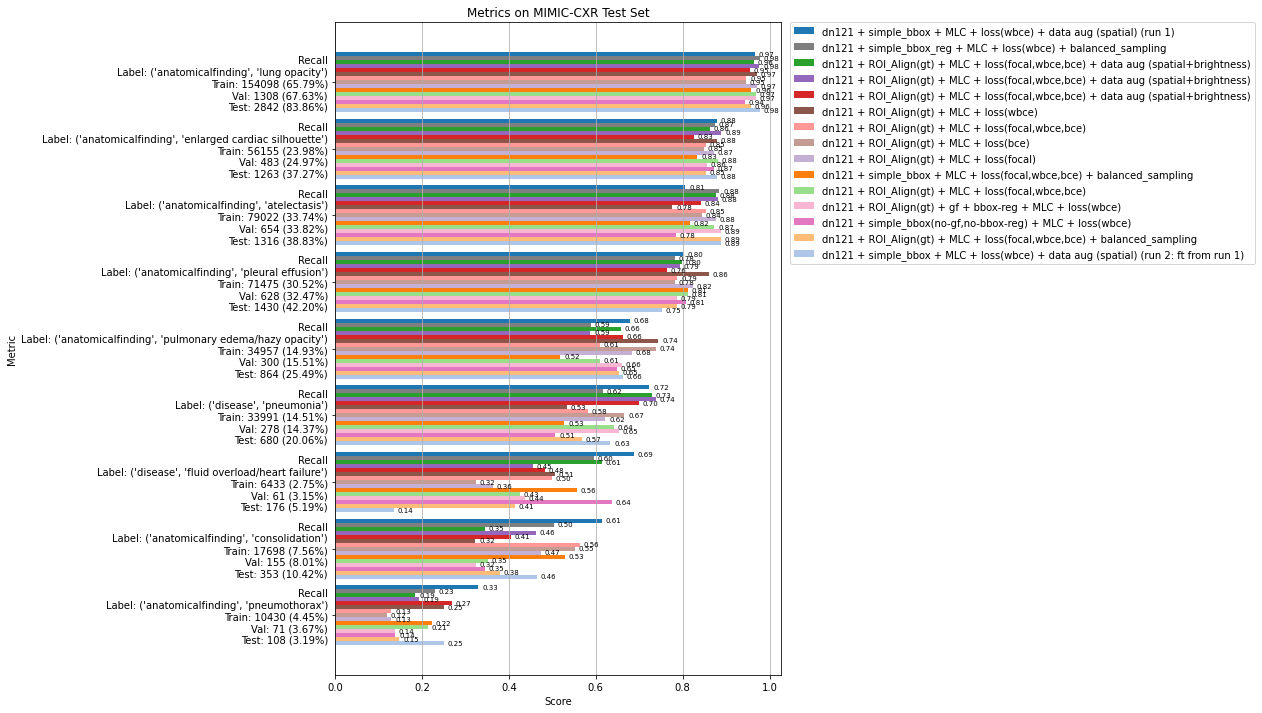

In [128]:
# metric = 'p'
# metric_alias = 'Precision'
metric = 'r'
metric_alias = 'Recall'
abnormalities = [
    'lung opacity',
    'pleural effusion',
    'atelectasis',
    'enlarged cardiac silhouette',
    'pulmonary edema/hazy opacity',
    'pneumothorax',
    'consolidation',
    'fluid overload/heart failure',
    'pneumonia',
]
metric_names = [f'{metric}({x})' for x in abnormalities]
metric_aliases = [get_train_val_test_summary_text_for_label(x, 'labels(min_freq=1000).pkl', 'imageId2labels(min_freq=1000).pkl')
                     for x in abnormalities]
metric_aliases = [f'{metric_alias}\n{x}' for x in metric_aliases]
plot_per_class_classification_metrics(
#     dataframe_rows=[
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230208_231030')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230302_221214')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230303_064112')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230304_140940')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230313_145330')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_073645')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_110248')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_122703')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_142409')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_143409')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_143905')].iloc[0],
#     ],
#     method_aliases=[
#         '(1)  vqa(dn121+onehot+transf),mlc:gf,nl:627,bbox:v2',
#         '(2)  dn121,mlc:gf,nl:379,aug:rand-bright-spatial,ft-from:(1)',
#         '(3)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,ft-from:(2)',
#         '(4)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,ft-from:(3)',
#         '(5)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,balanced-dataload,ft-from:(4)',
#         '(6)  dn121,mlc:gf,nl:379,aug:rand-spatial,focal-loss,ft-from:(1)',
#         '(7)  dn121,mlc:gf,nl:379,aug:rand-bright-spatial,focal-loss,ft-from:(6)',
#         '(8)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,focal-loss,ft-from:(4)',
#         '(9)  ensemble:1-8,nl:379',
#         '(10) ensemble:1-8,nl:379 (cheating)',
#         '(11) ensemble:2-8,nl:379',
#     ],
    dataframe_rows=[
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230208_231030')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230302_221214')].iloc[0]['metrics_path'],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230303_064112')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230304_140940')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230313_145330')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_073645')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_110248')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_122703')].iloc[0]['metrics_path'],        
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_142409')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_143409')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_143905')].iloc[0]['metrics_path'],
        # ROI align methods        
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230324_093504')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230324_090628')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_181539')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_153204')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_143952')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_120054')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_115911')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_002558')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_000616')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230322_235415')].iloc[0],        
        
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230327_160546')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230327_151837')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230330_030238')].iloc[0],
    ],
    method_aliases=[
#         '(1)  vqa(dn121+onehot+transf),mlc:gf,nl:627,bbox:v2',
#         '(2)  dn121,mlc:gf,nl:379,aug:rand-bright-spatial,ft-from:(1)',
        'dn121 + simple_bbox + MLC + loss(wbce) + data aug (spatial) (run 1)',  #'(3)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,ft-from:(2)',
        'dn121 + simple_bbox + MLC + loss(wbce) + data aug (spatial) (run 2: ft from run 1)',#'(4)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,ft-from:(3)',
#         '(5)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,balanced-dataload,ft-from:(4)',
#         '(6)  dn121,mlc:gf,nl:379,aug:rand-spatial,focal-loss,ft-from:(1)',
#         '(7)  dn121,mlc:gf,nl:379,aug:rand-bright-spatial,focal-loss,ft-from:(6)',
#         '(8)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,focal-loss,ft-from:(4)',
#         '(9)  ensemble:1-8,nl:379',
#         '(10) ensemble:1-8,nl:379 (cheating)',
#         '(11) ensemble:2-8,nl:379',
        # ROI align methods
        'dn121 + simple_bbox + MLC + loss(focal,wbce,bce) + balanced_sampling',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce) + balanced_sampling',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce) + data aug (spatial+brightness)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce) + data aug (spatial+brightness)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce) + data aug (spatial+brightness)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal)',
        'dn121 + ROI_Align(gt) + MLC + loss(wbce)',
        'dn121 + ROI_Align(gt) + MLC + loss(bce)',
        
        'dn121 + simple_bbox(no-gf,no-bbox-reg) + MLC + loss(wbce)',
        'dn121 + ROI_Align(gt) + gf + bbox-reg + MLC + loss(wbce)',
        'dn121 + simple_bbox_reg + MLC + loss(wbce) + balanced_sampling',
    ],
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    dataset_name='MIMIC-CXR Test Set',
    figsize=(8, 12),
)

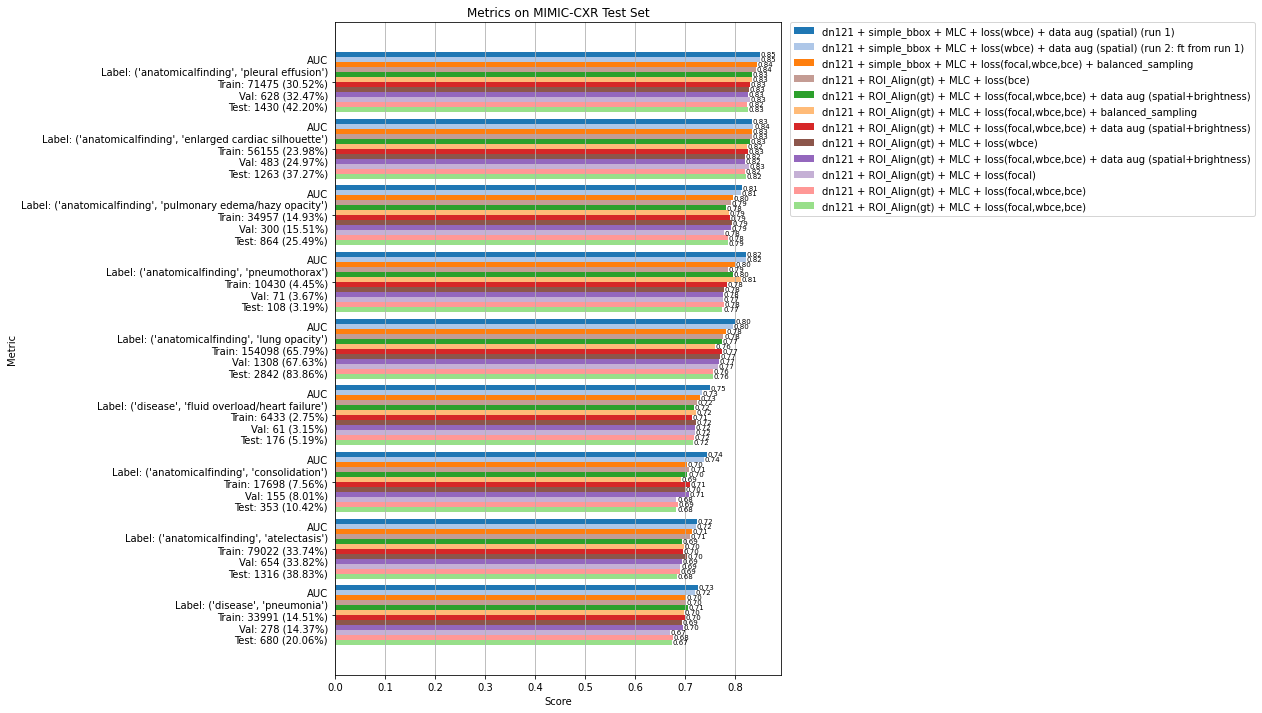

In [71]:
# metric = 'p'
# metric_alias = 'Precision'
metric = 'auc'
metric_alias = 'AUC'
abnormalities = [
    'lung opacity',
    'pleural effusion',
    'atelectasis',
    'enlarged cardiac silhouette',
    'pulmonary edema/hazy opacity',
    'pneumothorax',
    'consolidation',
    'fluid overload/heart failure',
    'pneumonia',
]
metric_names = [f'{metric}({x})' for x in abnormalities]
metric_aliases = [get_train_val_test_summary_text_for_label(x, 'labels(min_freq=1000).pkl', 'imageId2labels(min_freq=1000).pkl')
                     for x in abnormalities]
metric_aliases = [f'{metric_alias}\n{x}' for x in metric_aliases]
plot_per_class_classification_metrics(
#     dataframe_rows=[
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230208_231030')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230302_221214')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230303_064112')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230304_140940')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230313_145330')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_073645')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_110248')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_122703')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_142409')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_143409')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_143905')].iloc[0],
#     ],
#     method_aliases=[
#         '(1)  vqa(dn121+onehot+transf),mlc:gf,nl:627,bbox:v2',
#         '(2)  dn121,mlc:gf,nl:379,aug:rand-bright-spatial,ft-from:(1)',
#         '(3)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,ft-from:(2)',
#         '(4)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,ft-from:(3)',
#         '(5)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,balanced-dataload,ft-from:(4)',
#         '(6)  dn121,mlc:gf,nl:379,aug:rand-spatial,focal-loss,ft-from:(1)',
#         '(7)  dn121,mlc:gf,nl:379,aug:rand-bright-spatial,focal-loss,ft-from:(6)',
#         '(8)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,focal-loss,ft-from:(4)',
#         '(9)  ensemble:1-8,nl:379',
#         '(10) ensemble:1-8,nl:379 (cheating)',
#         '(11) ensemble:2-8,nl:379',
#     ],
        dataframe_rows=[
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230208_231030')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230302_221214')].iloc[0]['metrics_path'],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230303_064112')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230304_140940')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230313_145330')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_073645')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_110248')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_122703')].iloc[0]['metrics_path'],        
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_142409')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_143409')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_143905')].iloc[0]['metrics_path'],
        # ROI align methods        
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230324_093504')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230324_090628')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_181539')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_153204')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_143952')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_120054')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_115911')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_002558')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_000616')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230322_235415')].iloc[0],
    ],
    method_aliases=[
#         '(1)  vqa(dn121+onehot+transf),mlc:gf,nl:627,bbox:v2',
#         '(2)  dn121,mlc:gf,nl:379,aug:rand-bright-spatial,ft-from:(1)',
        'dn121 + simple_bbox + MLC + loss(wbce) + data aug (spatial) (run 1)',  #'(3)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,ft-from:(2)',
        'dn121 + simple_bbox + MLC + loss(wbce) + data aug (spatial) (run 2: ft from run 1)',#'(4)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,ft-from:(3)',
#         '(5)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,balanced-dataload,ft-from:(4)',
#         '(6)  dn121,mlc:gf,nl:379,aug:rand-spatial,focal-loss,ft-from:(1)',
#         '(7)  dn121,mlc:gf,nl:379,aug:rand-bright-spatial,focal-loss,ft-from:(6)',
#         '(8)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,focal-loss,ft-from:(4)',
#         '(9)  ensemble:1-8,nl:379',
#         '(10) ensemble:1-8,nl:379 (cheating)',
#         '(11) ensemble:2-8,nl:379',
        # ROI align methods
        'dn121 + simple_bbox + MLC + loss(focal,wbce,bce) + balanced_sampling',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce) + balanced_sampling',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce) + data aug (spatial+brightness)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce) + data aug (spatial+brightness)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce) + data aug (spatial+brightness)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal)',
        'dn121 + ROI_Align(gt) + MLC + loss(wbce)',
        'dn121 + ROI_Align(gt) + MLC + loss(bce)',
    ],
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    dataset_name='MIMIC-CXR Test Set',
    figsize=(8, 12),
)

In [174]:
reload(medvqa.evaluation.plots)
reload(medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management)

<module 'medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management' from '/home/pamessina/medvqa/medvqa/datasets/chest_imagenome/chest_imagenome_dataset_management.py'>

In [75]:
from medvqa.evaluation.plots import plot_class_frequency_vs_metric_scores_per_method
from medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management import get_train_val_test_stats_per_label

In [76]:
stats_per_label = get_train_val_test_stats_per_label('labels(min_freq=1000).pkl', 'imageId2labels(min_freq=1000).pkl')

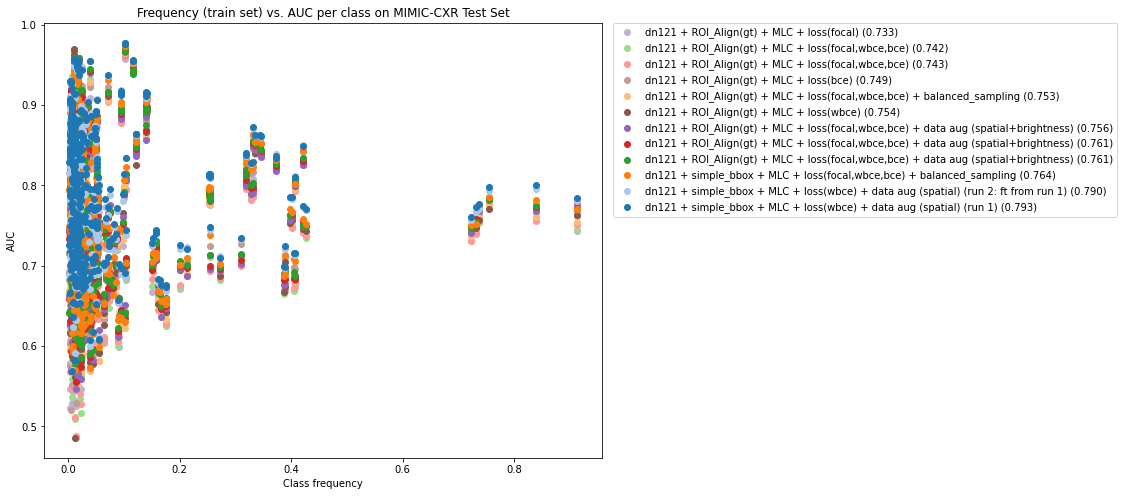

In [78]:
label_names = list(stats_per_label.keys())
label_frequencies = [stats_per_label[k]['test_fraction'] for k in label_names]
metric = 'auc'
metric_alias = 'AUC'
metric_names = [f'{metric}({x[1] if len(x) == 2 else x[0] + " " + x[2]})' for x in label_names]
freq_range = [0, 1]
valid_idxs = [i for i,f in enumerate(label_frequencies) if freq_range[0] <= f <= freq_range[1]]
label_names = [label_names[i] for i in valid_idxs]
label_frequencies = [label_frequencies[i] for i in valid_idxs]
metric_names = [metric_names[i] for i in valid_idxs]

plot_class_frequency_vs_metric_scores_per_method(
#     dataframe_rows=[
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230208_231030')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230302_221214')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230303_064112')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230304_140940')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230313_145330')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_073645')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_110248')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_122703')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_142409')].iloc[0],
# #         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_143409')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_143905')].iloc[0],
#     ],
#     method_aliases=[
#         '(1)  vqa(dn121+onehot+transf),mlc:gf,nl:627,bbox:v2',
#         '(2)  dn121,mlc:gf,nl:379,aug:rand-bright-spatial,ft-from:(1)',
#         '(3)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,ft-from:(2)',
#     __    '(4)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,ft-from:(3)',
#         '(5)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,balanced-dataload,ft-from:(4)',
#         '(6)  dn121,mlc:gf,nl:379,aug:rand-spatial,focal-loss,ft-from:(1)',
#         '(7)  dn121,mlc:gf,nl:379,aug:rand-bright-spatial,focal-loss,ft-from:(6)',
#         '(8)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,focal-loss,ft-from:(4)',
#         '(9)  ensemble:1-8,nl:379',
# #         '(10) ensemble:1-8,nl:379 (cheating)',
#         '(11) ensemble:2-8,nl:379',
#     ],
    dataframe_rows=[
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230208_231030')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230302_221214')].iloc[0]['metrics_path'],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230303_064112')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230304_140940')].iloc[0],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230313_145330')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_073645')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_110248')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230314_122703')].iloc[0]['metrics_path'],        
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_142409')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_143409')].iloc[0]['metrics_path'],
#         df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230315_143905')].iloc[0]['metrics_path'],
        # ROI align methods        
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230324_093504')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230324_090628')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_181539')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_153204')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_143952')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_120054')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_115911')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_002558')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230323_000616')].iloc[0],
        df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230322_235415')].iloc[0],
    ],
    method_aliases=[
#         '(1)  vqa(dn121+onehot+transf),mlc:gf,nl:627,bbox:v2',
#         '(2)  dn121,mlc:gf,nl:379,aug:rand-bright-spatial,ft-from:(1)',
        'dn121 + simple_bbox + MLC + loss(wbce) + data aug (spatial) (run 1)',  #'(3)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,ft-from:(2)',
        'dn121 + simple_bbox + MLC + loss(wbce) + data aug (spatial) (run 2: ft from run 1)',#'(4)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,ft-from:(3)',
#         '(5)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,balanced-dataload,ft-from:(4)',
#         '(6)  dn121,mlc:gf,nl:379,aug:rand-spatial,focal-loss,ft-from:(1)',
#         '(7)  dn121,mlc:gf,nl:379,aug:rand-bright-spatial,focal-loss,ft-from:(6)',
#         '(8)  dn121,mlc+bbox:v4,nl:379,aug:rand-spatial,focal-loss,ft-from:(4)',
#         '(9)  ensemble:1-8,nl:379',
#         '(10) ensemble:1-8,nl:379 (cheating)',
#         '(11) ensemble:2-8,nl:379',
        # ROI align methods
        'dn121 + simple_bbox + MLC + loss(focal,wbce,bce) + balanced_sampling',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce) + balanced_sampling',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce) + data aug (spatial+brightness)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce) + data aug (spatial+brightness)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal,wbce,bce) + data aug (spatial+brightness)',
        'dn121 + ROI_Align(gt) + MLC + loss(focal)',
        'dn121 + ROI_Align(gt) + MLC + loss(wbce)',
        'dn121 + ROI_Align(gt) + MLC + loss(bce)',
    ],
    metric_names=metric_names,
    label_frequencies=label_frequencies,
    title=f'Frequency (train set) vs. {metric_alias} per class on MIMIC-CXR Test Set',
    ylabel=metric_alias,
    figsize=(10, 8),
)

In [79]:
df_mlc_chstimgn.loc[(df_mlc_chstimgn['timestamp'] == '20230304_140940')].iloc[0]['metrics_path']

'/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230304_140940_mim_dn121/mimiccxr_test_set_multilabel_classification_metrics(chest-imagenome-calib-thresh).pkl'

In [58]:
df_mlc_chstimgn['metrics_path'][2]

'/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230303_064112_mim_dn121/mimiccxr_test_set_multilabel_classification_metrics(chest-imagenome-calib-thresh).pkl'

## 2) Chest ImaGenome GOLD set

In [1]:
from importlib import reload
import medvqa

In [2]:
# reload(medvqa.evaluation.visual_module)
# reload(medvqa.evaluation.results)

In [3]:
from medvqa.evaluation.results import get_chest_imagenome_multilabel_classification_metrics_dataframe

In [147]:
df_mlc_chstimgn_gold = get_chest_imagenome_multilabel_classification_metrics_dataframe('chest_imagenome_gold')

100%|██████████| 5/5 [00:00<00:00, 1987.07it/s]


In [69]:
df_mlc_chstimgn_gold.columns

Index(['metrics_path', 'num_labels', 'acc', 'f1(macro)', 'p(macro)',
       'r(macro)', 'f1(micro)', 'p(micro)', 'r(micro)',
       'f1(abdomen sub-diaphragmatic air)',
       ...
       'model', 'chstimgn_bbox_model', 'chstimgn_mlc_model', 'aug',
       'decent_images', 'binary_loss', 'mimiccxr_balanced_sampling', 'history',
       'escheat', 'num_ens'],
      dtype='object', length=2224)

In [148]:
# df_aux = df_mlc_chstimgn.sort_values(['f1(macro)'], ascending=False)
df_aux = df_mlc_chstimgn_gold.sort_values(['timestamp'], ascending=False)
df_aux = df_aux[[
    'timestamp',
    'folder', 'datasets', 'model', 'chstimgn_mlc_model', 'chstimgn_bbox_model', 'num_labels', 'aug', 'decent_images', 
    'binary_loss', 'mimiccxr_balanced_sampling', 'history', 'escheat', 'num_ens',
    'f1(macro)', 'f1(micro)', 'prcauc(macro)', 'prcauc(micro)', 'auc(macro)', 'auc(micro)',
    'rocauc(macro)', 'rocauc(micro)', 'acc',
]]
df_aux

,timestamp,folder,datasets,model,chstimgn_mlc_model,chstimgn_bbox_model,num_labels,aug,decent_images,binary_loss,...,num_ens,f1(macro),f1(micro),prcauc(macro),prcauc(micro),auc(macro),auc(micro),rocauc(macro),rocauc(micro),acc
0,20230330_030238,visual_module,1:mim,dn121,v4,v4,366,mim: random-spatial,True,wbce-c,...,None,0.259053,0.450835,0.255060,0.376749,0.836606,0.892261,0.838456,0.892261,0.922361
4,20230327_160546,visual_module,1:mim,dn121,v4_1,None,366,mim: None,True,wbce-c,...,None,0.223422,0.423322,0.231421,0.364432,0.820263,0.884740,0.822023,0.884740,0.913902
3,20230327_151837,visual_module,1:mim,dn121,v6,v6,366,mim: None,True,wbce-c,...,None,0.212393,0.418876,0.221687,0.334641,0.812788,0.882047,0.814507,0.882047,0.912317
2,20230323_000616,visual_module,1:mim,dn121,v5,None,366,mim: None,True,wbce-c,...,None,0.219776,0.419740,0.214658,0.340951,0.821861,0.881257,0.823629,0.881257,0.913005
1,20230303_064112,visual_module,1:mim,dn121,v4,v4,366,mim: random-spatial,True,wbce-c,...,None,0.254273,0.444665,0.254248,0.371558,0.842633,0.892105,0.844516,0.892105,0.920536


In [149]:
df_aux = df_mlc_chstimgn_gold.sort_values(['timestamp'], ascending=False)
df_aux = df_aux[[
    'timestamp',
    'folder', 'datasets', 'model', 'chstimgn_mlc_model', 'num_labels',
#                  'auc(lung opacity)',
#                  'auc(pleural effusion)',
#                  'auc(atelectasis)',
#                  'auc(enlarged cardiac silhouette)',
#                  'auc(pulmonary edema/hazy opacity)',
#                  'auc(pneumothorax)',
#                  'auc(consolidation)',
#                  'auc(fluid overload/heart failure)',
#                  'auc(pneumonia)',
                 'prcauc(lung opacity)',
                 'prcauc(pleural effusion)',
                 'prcauc(atelectasis)',
                 'prcauc(enlarged cardiac silhouette)',
                 'prcauc(pulmonary edema/hazy opacity)',
                 'prcauc(pneumothorax)',
                 'prcauc(consolidation)',
                 'prcauc(fluid overload/heart failure)',
                 'prcauc(pneumonia)',
#                 'f1(lung opacity)',
#                 'f1(pleural effusion)',
#                 'f1(atelectasis)',
#                 'f1(enlarged cardiac silhouette)',
#                 'f1(pulmonary edema/hazy opacity)',
#                 'f1(pneumothorax)',
#                 'f1(consolidation)',
#                 'f1(fluid overload/heart failure)',
#                 'f1(pneumonia)',
       ]]
df_aux

,timestamp,folder,datasets,model,chstimgn_mlc_model,num_labels,prcauc(lung opacity),prcauc(pleural effusion),prcauc(atelectasis),prcauc(enlarged cardiac silhouette),prcauc(pulmonary edema/hazy opacity),prcauc(pneumothorax),prcauc(consolidation),prcauc(fluid overload/heart failure),prcauc(pneumonia)
0,20230330_030238,visual_module,1:mim,dn121,v4,366,0.923414,0.704301,0.609404,0.695616,0.474986,0.111839,0.230219,0.093491,0.419057
4,20230327_160546,visual_module,1:mim,dn121,v4_1,366,0.910463,0.655759,0.623307,0.673151,0.550990,0.093210,0.236717,0.085522,0.343459
3,20230327_151837,visual_module,1:mim,dn121,v6,366,0.903994,0.668881,0.604805,0.687277,0.491791,0.063709,0.173823,0.073706,0.320377
2,20230323_000616,visual_module,1:mim,dn121,v5,366,0.907779,0.642552,0.635453,0.715973,0.484448,0.068573,0.172632,0.069656,0.317508
1,20230303_064112,visual_module,1:mim,dn121,v4,366,0.924944,0.703398,0.632864,0.693187,0.485885,0.105932,0.192058,0.121335,0.373677


In [40]:
reload(medvqa.evaluation.plots)

<module 'medvqa.evaluation.plots' from '/home/pamessina/medvqa/medvqa/evaluation/plots.py'>

In [74]:
from medvqa.evaluation.plots import plot_multilabel_classification_metrics, plot_per_class_classification_metrics
from medvqa.utils.constants import MetricNames

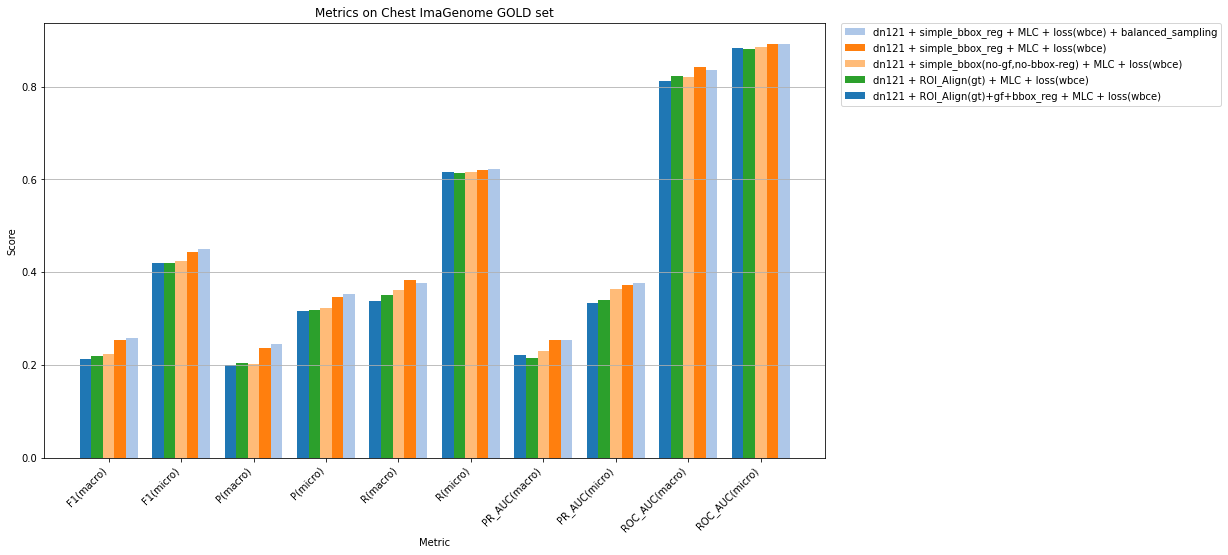

In [150]:
plot_multilabel_classification_metrics(
    metrics_paths=[
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230327_151837')].iloc[0]['metrics_path'],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230330_030238')].iloc[0]['metrics_path'],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230303_064112')].iloc[0]['metrics_path'],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230327_160546')].iloc[0]['metrics_path'],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230323_000616')].iloc[0]['metrics_path'],        
    ],
    method_aliases=[
        'dn121 + ROI_Align(gt)+gf+bbox_reg + MLC + loss(wbce)',
        'dn121 + simple_bbox_reg + MLC + loss(wbce) + balanced_sampling',
        'dn121 + simple_bbox_reg + MLC + loss(wbce)',
        'dn121 + simple_bbox(no-gf,no-bbox-reg) + MLC + loss(wbce)',
        'dn121 + ROI_Align(gt) + MLC + loss(wbce)',
    ],
    metric_aliases=[
        'F1(macro)',
        'F1(micro)',
        'P(macro)',
        'P(micro)',
        'R(macro)',
        'R(micro)',
        'PR_AUC(macro)',
        'PR_AUC(micro)',
        'ROC_AUC(macro)',
        'ROC_AUC(micro)',
    ],
    metric_getters=[
        lambda x:x[MetricNames.CHESTIMAGENOMELABEL_PRF1]['f1_macro_avg'],
        lambda x:x[MetricNames.CHESTIMAGENOMELABEL_PRF1]['f1_micro_avg'],
        lambda x:x[MetricNames.CHESTIMAGENOMELABEL_PRF1]['p_macro_avg'],
        lambda x:x[MetricNames.CHESTIMAGENOMELABEL_PRF1]['p_micro_avg'],
        lambda x:x[MetricNames.CHESTIMAGENOMELABEL_PRF1]['r_macro_avg'],
        lambda x:x[MetricNames.CHESTIMAGENOMELABEL_PRF1]['r_micro_avg'],
        lambda x:x[MetricNames.CHESTIMAGENOMELABELPRCAUC]['macro_avg'],
        lambda x:x[MetricNames.CHESTIMAGENOMELABELPRCAUC]['micro_avg'],
        lambda x:x[MetricNames.CHESTIMAGENOMELABELAUC]['macro_avg'],
        lambda x:x[MetricNames.CHESTIMAGENOMELABELAUC]['micro_avg'],
    ],    
    dataset_name='Chest ImaGenome GOLD set',
    figsize=(14, 8),
    rotate_xticks=True,
)


In [43]:
reload(medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management)

<module 'medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management' from '/home/pamessina/medvqa/medvqa/datasets/chest_imagenome/chest_imagenome_dataset_management.py'>

In [44]:
from medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management import get_train_val_test_summary_text_for_label

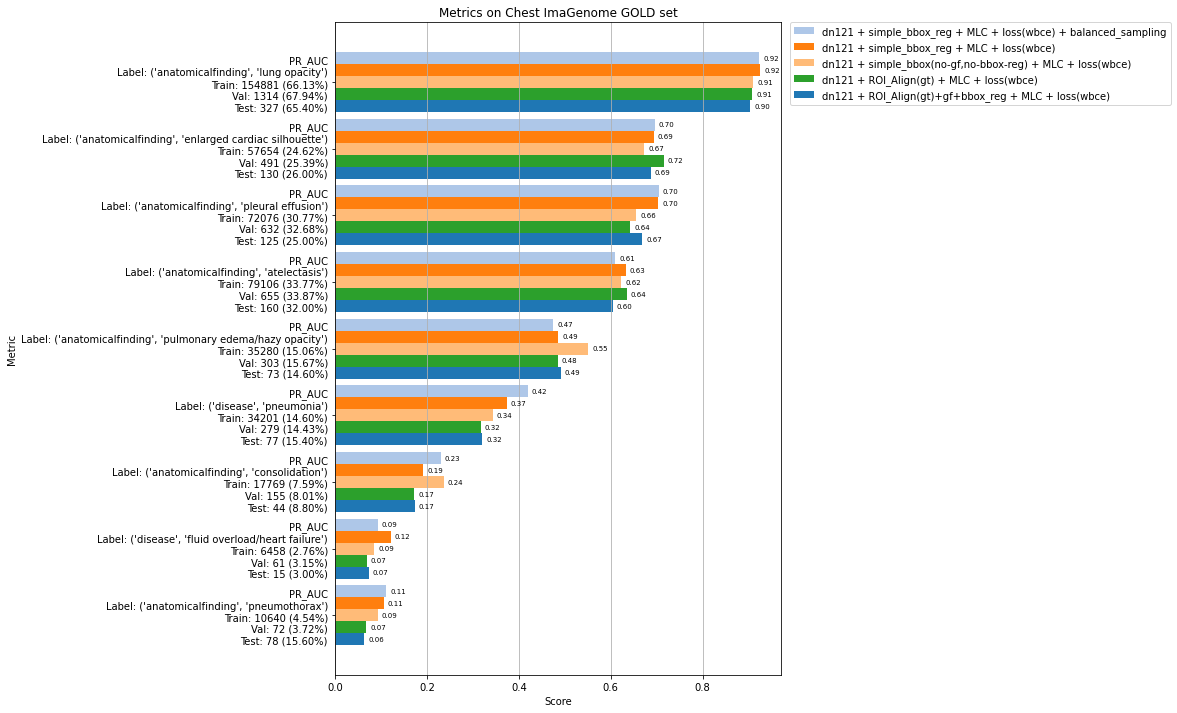

In [151]:
# metric = 'p'
# metric_alias = 'Precision'
# metric = 'r'
# metric_alias = 'Recall'
metric = 'prcauc'
metric_alias = 'PR_AUC'
# metric = 'f1'
# metric_alias = 'F1'
abnormalities = [
    'lung opacity',
    'pleural effusion',
    'atelectasis',
    'enlarged cardiac silhouette',
    'pulmonary edema/hazy opacity',
    'pneumothorax',
    'consolidation',
    'fluid overload/heart failure',
    'pneumonia',
]
metric_names = [f'{metric}({x})' for x in abnormalities]
metric_aliases = [get_train_val_test_summary_text_for_label(x, 'labels(min_freq=1000).pkl',
                                                            'imageId2labels(min_freq=1000).pkl', use_gold_in_test=True)
                     for x in abnormalities]
metric_aliases = [f'{metric_alias}\n{x}' for x in metric_aliases]
plot_per_class_classification_metrics(
    dataframe_rows=[
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230327_151837')].iloc[0],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230330_030238')].iloc[0],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230303_064112')].iloc[0],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230327_160546')].iloc[0],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230323_000616')].iloc[0],
    ],
    method_aliases=[
        'dn121 + ROI_Align(gt)+gf+bbox_reg + MLC + loss(wbce)',
        'dn121 + simple_bbox_reg + MLC + loss(wbce) + balanced_sampling',
        'dn121 + simple_bbox_reg + MLC + loss(wbce)',
        'dn121 + simple_bbox(no-gf,no-bbox-reg) + MLC + loss(wbce)',
        'dn121 + ROI_Align(gt) + MLC + loss(wbce)',
    ],
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    dataset_name='Chest ImaGenome GOLD set',
    figsize=(8, 12),
)

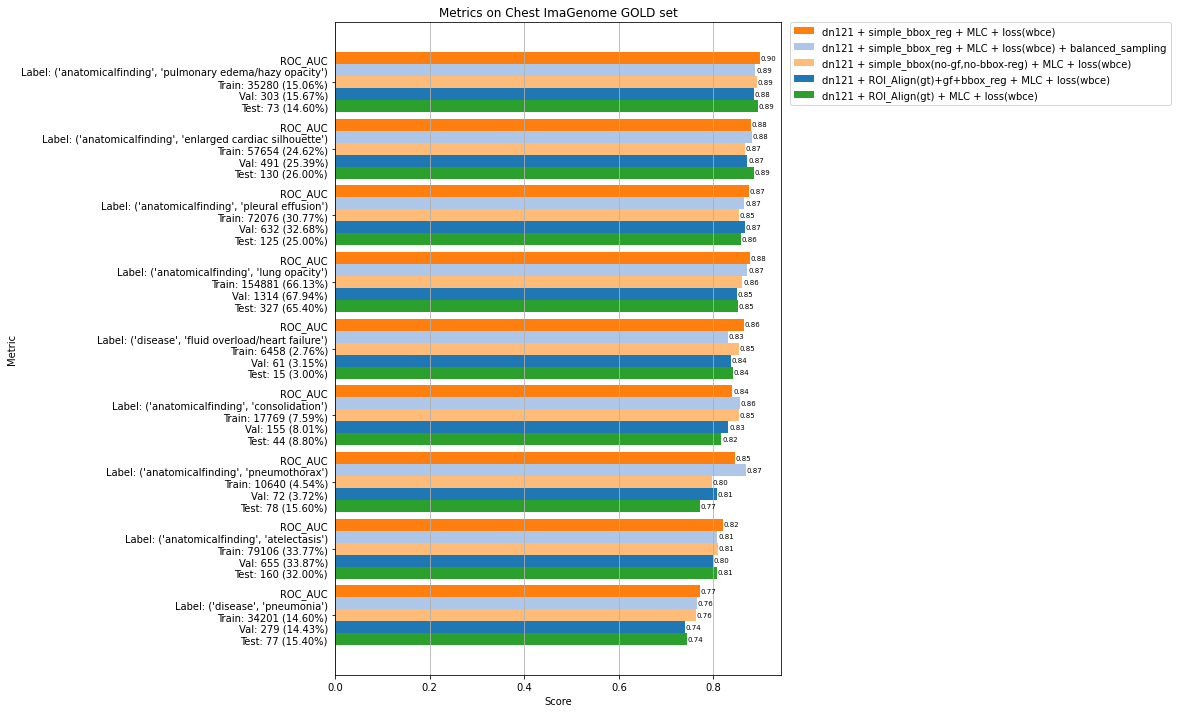

In [152]:
# metric = 'p'
# metric_alias = 'Precision'
# metric = 'r'
# metric_alias = 'Recall'
metric = 'rocauc'
metric_alias = 'ROC_AUC'
# metric = 'f1'
# metric_alias = 'F1'
abnormalities = [
    'lung opacity',
    'pleural effusion',
    'atelectasis',
    'enlarged cardiac silhouette',
    'pulmonary edema/hazy opacity',
    'pneumothorax',
    'consolidation',
    'fluid overload/heart failure',
    'pneumonia',
]
metric_names = [f'{metric}({x})' for x in abnormalities]
metric_aliases = [get_train_val_test_summary_text_for_label(x, 'labels(min_freq=1000).pkl',
                                                            'imageId2labels(min_freq=1000).pkl', use_gold_in_test=True)
                     for x in abnormalities]
metric_aliases = [f'{metric_alias}\n{x}' for x in metric_aliases]
plot_per_class_classification_metrics(
    dataframe_rows=[
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230327_151837')].iloc[0],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230330_030238')].iloc[0],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230303_064112')].iloc[0],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230327_160546')].iloc[0],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230323_000616')].iloc[0],
    ],
    method_aliases=[
        'dn121 + ROI_Align(gt)+gf+bbox_reg + MLC + loss(wbce)',
        'dn121 + simple_bbox_reg + MLC + loss(wbce) + balanced_sampling',
        'dn121 + simple_bbox_reg + MLC + loss(wbce)',
        'dn121 + simple_bbox(no-gf,no-bbox-reg) + MLC + loss(wbce)',
        'dn121 + ROI_Align(gt) + MLC + loss(wbce)',
    ],
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    dataset_name='Chest ImaGenome GOLD set',
    figsize=(8, 12),
)

In [56]:
reload(medvqa.evaluation.plots)
reload(medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management)

<module 'medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management' from '/home/pamessina/medvqa/medvqa/datasets/chest_imagenome/chest_imagenome_dataset_management.py'>

In [57]:
from medvqa.evaluation.plots import plot_class_frequency_vs_metric_scores_per_method
from medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management import get_train_val_test_stats_per_label

In [51]:
stats_per_label = get_train_val_test_stats_per_label('labels(min_freq=1000).pkl', 'imageId2labels(min_freq=1000).pkl',
                                                    use_gold_in_test=True)

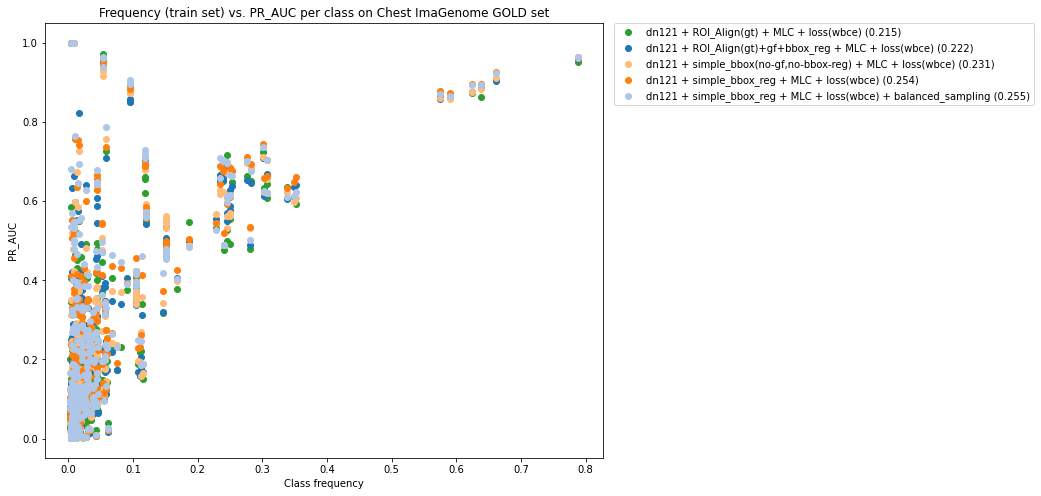

In [153]:
label_names = list(stats_per_label.keys())
label_frequencies = [stats_per_label[k]['train_fraction'] for k in label_names]
metric = 'prcauc'
metric_alias = 'PR_AUC'
metric_names = [f'{metric}({x[1] if len(x) == 2 else x[0] + " " + x[2]})' for x in label_names]
freq_range = [0, 1]
valid_idxs = [i for i,f in enumerate(label_frequencies) if freq_range[0] <= f <= freq_range[1]]
label_names = [label_names[i] for i in valid_idxs]
label_frequencies = [label_frequencies[i] for i in valid_idxs]
metric_names = [metric_names[i] for i in valid_idxs]
columns_set = set(df_mlc_chstimgn_gold.columns)
valid_idxs = []
for i, x in enumerate(metric_names):
    if x in columns_set:
        valid_idxs.append(i)
label_names = [label_names[i] for i in valid_idxs]
label_frequencies = [label_frequencies[i] for i in valid_idxs]
metric_names = [metric_names[i] for i in valid_idxs]

plot_class_frequency_vs_metric_scores_per_method(
    dataframe_rows=[
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230327_151837')].iloc[0],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230330_030238')].iloc[0],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230303_064112')].iloc[0],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230327_160546')].iloc[0],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230323_000616')].iloc[0],
    ],
    method_aliases=[
        'dn121 + ROI_Align(gt)+gf+bbox_reg + MLC + loss(wbce)',
        'dn121 + simple_bbox_reg + MLC + loss(wbce) + balanced_sampling',
        'dn121 + simple_bbox_reg + MLC + loss(wbce)',
        'dn121 + simple_bbox(no-gf,no-bbox-reg) + MLC + loss(wbce)',
        'dn121 + ROI_Align(gt) + MLC + loss(wbce)',
    ],
    metric_names=metric_names,
    label_frequencies=label_frequencies,
    title=f'Frequency (train set) vs. {metric_alias} per class on Chest ImaGenome GOLD set',
    ylabel=metric_alias,
    figsize=(10, 8),
)

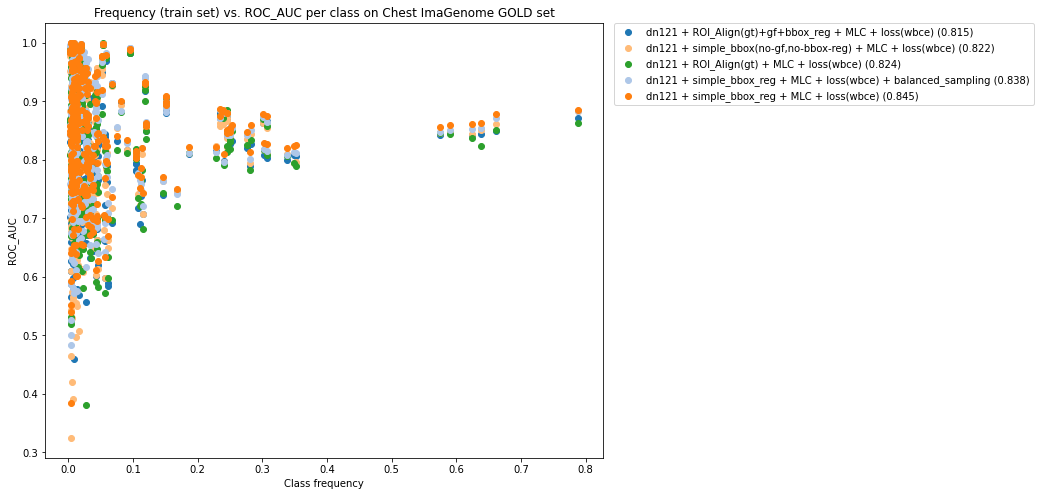

In [154]:
label_names = list(stats_per_label.keys())
label_frequencies = [stats_per_label[k]['train_fraction'] for k in label_names]
metric = 'rocauc'
metric_alias = 'ROC_AUC'
metric_names = [f'{metric}({x[1] if len(x) == 2 else x[0] + " " + x[2]})' for x in label_names]
freq_range = [0, 1]
valid_idxs = [i for i,f in enumerate(label_frequencies) if freq_range[0] <= f <= freq_range[1]]
label_names = [label_names[i] for i in valid_idxs]
label_frequencies = [label_frequencies[i] for i in valid_idxs]
metric_names = [metric_names[i] for i in valid_idxs]
columns_set = set(df_mlc_chstimgn_gold.columns)
valid_idxs = []
for i, x in enumerate(metric_names):
    if x in columns_set:
        valid_idxs.append(i)
label_names = [label_names[i] for i in valid_idxs]
label_frequencies = [label_frequencies[i] for i in valid_idxs]
metric_names = [metric_names[i] for i in valid_idxs]

plot_class_frequency_vs_metric_scores_per_method(
    dataframe_rows=[
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230327_151837')].iloc[0],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230330_030238')].iloc[0],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230303_064112')].iloc[0],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230327_160546')].iloc[0],
        df_mlc_chstimgn_gold.loc[(df_mlc_chstimgn_gold['timestamp'] == '20230323_000616')].iloc[0],
    ],
    method_aliases=[
        'dn121 + ROI_Align(gt)+gf+bbox_reg + MLC + loss(wbce)',
        'dn121 + simple_bbox_reg + MLC + loss(wbce) + balanced_sampling',
        'dn121 + simple_bbox_reg + MLC + loss(wbce)',
        'dn121 + simple_bbox(no-gf,no-bbox-reg) + MLC + loss(wbce)',
        'dn121 + ROI_Align(gt) + MLC + loss(wbce)',
    ],
    metric_names=metric_names,
    label_frequencies=label_frequencies,
    title=f'Frequency (train set) vs. {metric_alias} per class on Chest ImaGenome GOLD set',
    ylabel=metric_alias,
    figsize=(10, 8),
)

In [60]:
# from importlib import reload
# import medvqa

In [61]:
# reload(medvqa.models.checkpoint)

In [62]:
# from medvqa.models.checkpoint import get_model_training_history, print_model_training_history_summary

In [63]:
# history = get_model_training_history('/mnt/data/pamessina/workspaces/medvqa-workspace/models/vqa/20230208_231030_mim+mim(chex)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,1.0_medtok_chx_amp')

In [64]:
# history

In [65]:
# print_model_training_history_summary('/mnt/data/pamessina/workspaces/medvqa-workspace/models/vqa/20230208_231030_mim+mim(chex)_oevqa(dense121+onehot+transf)_visenc-pretr=0_dws=1.0,1.0_medtok_chx_amp', show_details=True)

In [66]:
# print_model_training_history_summary('/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230302_221214_mim_dn121/', show_details=True)

In [67]:
# print_model_training_history_summary('/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230304_140940_mim_dn121/', show_details=True)